In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Extra imports to simplify code
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Imported models
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LinearRegression as linr
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.ensemble import GradientBoostingClassifier as gbc

# Extra models
from sklearn.linear_model import RidgeClassifier as lnrc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

# Preprocessing
- Removing none types from columns
- Converting all textual data into numeric data


In [ ]:
# Remove none types from columns where relavant

df = pd.read_csv('okcupid_profiles.csv', encoding='utf-8')

df.replace([np.nan], None, inplace = True)
df.replace(['used up', 'rather not say'], None, inplace = True)
df = df.dropna(subset=['body_type','drinks', 'drugs', 'education', 'ethnicity', 
                       'height', 'income', 'job', 'last_online', 'location', 
                       'smokes', 'speaks'])

df.replace([None], 'none', inplace = True)

df['sign_data'] = df['sign'].apply(lambda x: x.split()[0])
df['sign_intensity'] = df['sign'].apply(lambda x: " ".join(x.split()[1:]))
df['religion_data'] = df['religion'].apply(lambda x: x.split()[0])
df['religion_intensity'] = df['religion'].apply(lambda x: " ".join(x.split()[1:]))
#print(sorted(df['religion_data'].unique()))


# Removing nulls from sign_intensity

### This line of code will replace empty entries in religion intensity and 
### sign_intensity with -1
#df.replace([''], -1, inplace = True)


df['religion_intensity'].replace([''], None, inplace = True)
df['sign_data'].replace(['none'], None, inplace = True)
df['sign_intensity'].replace([''], None, inplace = True)
df['sign_intensity'].replace(['and it matters a lot'], 'and it&rsquo;s fun to think about', inplace = True)
#df['sign_intensity'].replace(['and it matters a lot'], None, inplace = True)
df = df.dropna(subset=['sign_data', 'sign_intensity', 'religion_intensity'])
print(df['sign_intensity'].unique())

['but it doesn&rsquo;t matter' 'and it&rsquo;s fun to think about']


In [ ]:
# Change labels into numbers

# Status -    Sorted based on how committed the person currently are
df['status_data'] = df['status']
df['status_data'].replace(['single'], 0, inplace = True)
df['status_data'].replace(['available'], 1, inplace = True)
df['status_data'].replace(['unknown'], 2, inplace = True)
df['status_data'].replace(['seeing someone'], 3, inplace = True)
df['status_data'].replace(['married'], 4, inplace = True)

# Sex
df['sex_data'] = df['sex']
df['sex_data'].replace(['m'], 0, inplace = True)
df['sex_data'].replace(['f'], 1, inplace = True)

# Height independent of sex
df['height_data'] = np.where(df['sex_data']==1, df['height'] - 63.8, df['height'] - 69.4)


# Orientation - Split into [straight, bisexual, gay]
df['orientation_data'] = df['orientation']
df['orientation_data'].replace(['straight'], 0, inplace = True)
df['orientation_data'].replace(['bisexual'], 1, inplace = True)
df['orientation_data'].replace(['gay'], 2, inplace = True)

# Body type -   Sorted based on body fat %
df['body_type_data'] = df['body_type']
df['body_type_data'].replace(['jacked'], 0, inplace = True)
df['body_type_data'].replace(['athletic'], 1, inplace = True)
df['body_type_data'].replace(['fit'], 2, inplace = True)
df['body_type_data'].replace(['thin'], 3, inplace = True)
df['body_type_data'].replace(['skinny'], 4, inplace = True)
df['body_type_data'].replace(['average'], 5, inplace = True)
df['body_type_data'].replace(['a little extra'], 6, inplace = True)
df['body_type_data'].replace(['curvy'], 7, inplace = True)
df['body_type_data'].replace(['full figured'], 8, inplace = True)
df['body_type_data'].replace(['overweight'], 9, inplace = True)

# Diet
diet_labels = sorted(df['diet'].unique())
df['diet_data'] = df['diet']
for x in range(len(diet_labels)):
  df['diet_data'].replace([diet_labels[x]], x, inplace = True)

# Drinks -      Sorted basd on frequency
drinks_labels = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
df['drinks_data'] = df['drinks']
for x in range(len(drinks_labels)):
  df['drinks_data'].replace([drinks_labels[x]], x, inplace = True)

# Drugs -       Sorted basd on frequency
drugs_labels = ['never', 'sometimes', 'often']
df['drugs_data'] = df['drugs']
for x in range(len(drugs_labels)):
  df['drugs_data'].replace([drugs_labels[x]], x, inplace = True)

# Education -   Grouped into general level of education
education_primary = ['dropped out of high school', 'dropped out of space camp',
                     'working on high school', ]
education_secondary = ['high school', 'graduated from high school',
                       'working on space camp', 'graduated from space camp',
                       'space camp',]
education_collegecurrent = ['working on college/university', 'working on two-year college',
                     'dropped out of college/university', 'dropped out of two-year college',
                     ]
education_college = ['graduated from college/university', 'graduated from two-year college',
                     'college/university', 'two-year college', ]
education_gradschoolcurrent = ['working on masters program', 'working on law school',
                              'dropped out of masters program', 'dropped out of law school',
                              ]
education_gradschool = ['graduated from masters program', 'graduated from law school',
                        'masters program', 'law school', ]
education_phdcurrent = ['working on ph.d program', 'dropped out of ph.d program',
                        'working on med school', 'dropped out of med school']
education_phd = ['graduated from ph.d program', 'graduated from med school',
                 'ph.d program', 'med school']

education_labels = [education_primary, education_secondary, education_collegecurrent,
                    education_college, education_gradschoolcurrent, education_gradschool,
                    education_gradschool, education_phdcurrent, education_phd]
df['education_data'] = df['education']
for x in range(len(education_labels)):
  df['education_data'].replace(education_labels[x], x, inplace = True)

# Ethnicity -   Extremely problematic, not worth using, column will be removed
#               from training and testing dataset

# Job -         Groups aren't distinguisable so labels have been sorted 
#               alphabetically
job_labels = sorted(df['job'].unique())
df['job_data'] = df['job']
for x in range(len(job_labels)):
  df['job_data'].replace([job_labels[x]], x, inplace = True)

# Last Online - Dates are converted into minutes
max_date = np.array([int(_) for _ in df['last_online'].max().split('-')])
def convert(str_date):
  time = [int(_) for _ in str_date.split('-')]
  my_quant_diffs = max_date - np.array([int(_) for _ in time])
  return np.dot(np.array([525949, 43829, 1440, 60, 1]), my_quant_diffs)
df['last_online_data'] = df['last_online'].apply(convert)

# Offspring  - Grouped into [none, one, many] # of kids
df['offspring_data'] = df['offspring']
classifiers = (["doesn't have kids, but might want them", "doesn't want kids",
 "doesn't have kids, but wants them", "doesn't have kids", 'wants kids', 
 "doesn't have kids, and doesn't want any", 'might want kids'], 
 ['has a kid', "has a kid, but doesn't want more", 'has a kid, and wants more', 
  'has a kid, and might want more'], 
 ['has kids', "has kids, but doesn't want more", 'has kids, and might want more',
 'has kids, and wants more']
 )
for i in range(3):
  df['offspring_data'].replace(classifiers[i], i, inplace=True)
df['offspring_data'].replace(['none'], -1, inplace = True)

# Religious Data -  Sorted roughly based on similarity of belief (ranging from
#                   theists to atheists)

religion_labels = ['catholicism', 'christianity', 'hinduism', 'islam', 'judaism','buddhism','other', 'none', 'agnosticism','atheism',]
for x in range(len(religion_labels)):
  df['religion_data'].replace([religion_labels[x]], x, inplace = True)
for i, intensity in enumerate(['and laughing about it', 'and somewhat serious about it',  'but not too serious about it', 'and very serious about it']):
  df['religion_intensity'].replace([intensity], i, inplace=True)
df['religion_intensity'].replace([''], -1, inplace = True)


# Sign Data -     Sorted according to appearance in the year
sign_labels = ['capricorn', 'aquarius', 'pisces', 'aries', 'taurus', 'gemini',
               'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius']
for x in range(len(sign_labels)):
  df['sign_data'].replace([sign_labels[x]], x, inplace = True)
for i, intensity in enumerate(['but it doesn&rsquo;t matter', 'and it&rsquo;s fun to think about', 'and it matters a lot']):
  df['sign_intensity'].replace([intensity], i, inplace=True)


# Smokes Data -   Sorted based on frequency
df['smokes_data'] = df['smokes'] 
for i, how_much in enumerate(['no', 'trying to quit', 'when drinking', 'sometimes', 'yes']):
  df['smokes_data'].replace([how_much], i, inplace=True)

# Language information -  Split into monolingual and polylingual
df['speaks_data'] = np.where(df['speaks'].str.split().str.len() <= 1, 0, 1)

# Essay informtion -      Converted to just length of essays
for i in range(10):
  df['essay{}_data'.format(i)] = df['essay{}'.format(i)].str.split().str.len()
essay_labels = ['essay0_data','essay1_data','essay2_data','essay3_data',
                'essay4_data','essay5_data','essay6_data','essay7_data',
                'essay8_data','essay9_data']
essay_lens = pd.DataFrame()
for x in essay_labels:
  essay_lens[x] = df[x]
df['essay_len'] = essay_lens.sum(axis=1, numeric_only= True)

In [ ]:
def verify_numeric():
  #Call this function to verify that the converted numeric data is actually
  #numeric
  print(df['status_data'].unique())
  print(df['sex_data'].unique())
  print(df['orientation_data'].unique())
  print(df['body_type_data'].unique())
  print(df['diet_data'].unique())
  print(df['drinks_data'].unique())
  print(df['drugs_data'].unique())
  print(df['education_data'].unique())
  print(df['job_data'].unique())
  print(df['offspring_data'].unique())
  print(df['religion_data'].unique())
  print(df['religion_intensity'].unique())
  print(df['sign_data'].unique())
  print(df['sign_intensity'].unique())

# Columns

In [ ]:
# Clone the numeric columns into a seperate data frame, columns selected are in the columns array
numeric = None
numeric = pd.DataFrame()
columns = ['sign_intensity', 'age', 'height', 'income',
           'sign_data', 'religion_data', 'religion_intensity', 'status_data',
           'sex_data', 'height_data', 'orientation_data', 'body_type_data',
           'diet_data', 'drinks_data', 'drugs_data', 'education_data', 'job_data',
           'last_online_data', 'offspring_data', 'smokes_data', 'speaks_data',
           'essay0_data', 'essay1_data', 'essay2_data', 'essay3_data', 'essay4_data',
           'essay5_data', 'essay6_data', 'essay7_data', 'essay8_data', 'essay9_data', 'essay_len']
for x in columns:
  numeric[x] = df[x]
print("The dataset has " + str(len(columns)) + " columns")
numeric.corr()

The dataset has 32 columns


,sign_intensity,age,height,income,sign_data,religion_data,religion_intensity,status_data,sex_data,height_data,...,essay1_data,essay2_data,essay3_data,essay4_data,essay5_data,essay6_data,essay7_data,essay8_data,essay9_data,essay_len
sign_intensity,1.000000,0.021602,-0.110963,-0.006411,0.007643,-0.080336,0.000466,0.001815,0.145914,-0.011825,...,0.027798,0.022363,0.004596,0.034648,-0.008407,0.014758,0.017612,0.018945,0.028810,0.041236
age,0.021602,1.000000,-0.037120,0.000567,-0.005894,-0.056212,0.051624,-0.058474,0.059859,0.006265,...,0.039007,-0.000338,-0.040876,-0.062347,-0.011660,0.006736,-0.014784,-0.015840,0.016405,0.024429
height,-0.110963,-0.037120,1.000000,0.073559,0.011844,0.125301,-0.063581,-0.007334,-0.656208,0.716013,...,0.014873,0.022394,0.034261,0.012181,0.011108,0.021251,-0.012598,0.016580,-0.002404,0.013648
income,-0.006411,0.000567,0.073559,1.000000,0.010196,0.024006,-0.014319,0.009979,-0.095417,0.009053,...,-0.008937,-0.012182,-0.016500,-0.011396,-0.022577,-0.007265,-0.011433,0.006390,0.009862,-0.007162
sign_data,0.007643,-0.005894,0.011844,0.010196,1.000000,0.004750,-0.005993,-0.003050,-0.008136,0.008144,...,0.010083,0.002101,0.009199,0.020706,0.017878,0.011959,0.010057,0.015444,0.005279,0.015349
religion_data,-0.080336,-0.056212,0.125301,0.024006,0.004750,1.000000,-0.205683,0.092302,-0.107106,0.066698,...,0.115020,0.094299,0.092727,0.188936,0.085077,0.114126,0.059744,0.081079,0.100486,0.162612
religion_intensity,0.000466,0.051624,-0.063581,-0.014319,-0.005993,-0.205683,1.000000,-0.045572,0.059345,-0.029222,...,-0.050502,-0.047099,-0.046900,-0.083922,-0.029195,-0.058596,-0.040577,-0.046284,-0.059103,-0.079382
status_data,0.001815,-0.058474,-0.007334,0.009979,-0.003050,0.092302,-0.045572,1.000000,0.018308,0.007233,...,0.056417,0.057576,0.068926,0.095086,0.058859,0.077780,0.046429,0.069459,0.060663,0.095243
sex_data,0.145914,0.059859,-0.656208,-0.095417,-0.008136,-0.107106,0.059345,0.018308,1.000000,0.056910,...,-0.004533,-0.013464,-0.024360,0.014972,0.002342,-0.007908,0.015556,-0.023421,0.024422,0.015039
height_data,-0.011825,0.006265,0.716013,0.009053,0.008144,0.066698,-0.029222,0.007233,0.056910,1.000000,...,0.015485,0.017173,0.022795,0.029968,0.016863,0.020802,-0.002278,0.000270,0.019413,0.031971


# Generating train and test sets with three ratios:
- 50/50
- 70/30
- 80/20

In [ ]:
# Seed for different samplings is 1234
sampling_seed = 1234

data = numeric[columns[1:]]
label = numeric[columns[0]]
data1_train, data1_test, label1_train, label1_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.5)
data2_train, data2_test, label2_train, label2_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.3)
data3_train, data3_test, label3_train, label3_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.2)



In [ ]:
print("The labels have a split of " + str(Counter(label)[0]/len(numeric['sign_intensity'])))
print("The dataset has " + str(len(numeric['sign_intensity'])) + " rows")

The labels have a split of 0.47594098993519923
The dataset has 14506 rows


# Functions


In [ ]:
# Code block for functions
def plot_learning_curve_many(models, names, train_data, train_label):
  # Create plot with n subplots where n is the number of models plugged into the function
  fig, ax = plt.subplots(nrows=1, ncols=len(models), figsize=(6*len(models), 6), sharey=True)
  options = {
    "X": train_data,
    "y": train_label,
    "cv" : StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_type": "both",
    "score_name": "Accuracy",
  }
  #Iterate through models and plot the learning curves
  for ax_idx, model in enumerate(models):
    LearningCurveDisplay.from_estimator(model, **options, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for " + names[ax_idx])

def plot_learning_curve(model, name, train_data, train_label, curr_split):
  # Create plot with n subplots where n is the number of models plugged into the function
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
  options = {
    "X": train_data,
    "y": train_label,
    "cv" : StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_type": "both",
    "score_name": "Accuracy",
  }
  #Iterate through models and plot the learning curves
  LearningCurveDisplay.from_estimator(model, **options, ax=ax)
  handles, label = ax.get_legend_handles_labels()
  ax.legend(handles[:2], ["Training Score", "Test Score"])
  ax.set_title(f"Learning Curve for " + name + " on split " + str(curr_split))

def plot(data, label, xlabel, ylabel):
  %matplotlib inline
  figure, axis = plt.subplots(1,1)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  axis.scatter(data[ 0], data[ 1], c = label, s=30, cmap = 'rainbow');

def graph_cm(y_test, y_test_pred, classes, name, curr_split):
  cm = confusion_matrix(y_test, y_test_pred)
  figure, axis = plt.subplots()
  im = axis.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
  axis.figure.colorbar(im, ax=axis)
  axis.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),
           xticklabels=classes,yticklabels=classes,xlabel='Predicted label',
           ylabel='True label')
  axis.set_title(f"Confusion Matrix for best "+ name+ " on split "+ str(curr_split))
  thresh = (cm.max()- cm.min())/2 + cm.min()
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          axis.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  plt.show()

def homebrew_cross_validate(model, name, splits, curr_split, seed):
  plot_learning_curve(model, name, splits[curr_split][0],
                      splits[curr_split][1], curr_split)
  scores = cross_validate(model, splits[curr_split][0], splits[curr_split][1],
                      cv = StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
                      #Specify returned scores here
                        scoring = ['accuracy','precision_weighted',
                                   'recall_weighted','f1_weighted'])
  print("\n" + name + " Metrics for 10-fold on split " + str(curr_split))
  print("Fold\tAccuracy\tPrecision\tRecall\t\tF1")
  for x in range(len(scores['test_accuracy'])):
    print(str(x) + "\t\t" + str(round(scores['test_accuracy'][x], 3))+ "  \t\t" + 
          str(round(scores['test_precision_weighted'][x], 3))+ "  \t\t" +
          str(round(scores['test_recall_weighted'][x], 3))+ "  \t" +
          str(round(scores['test_f1_weighted'][x], 3)))
  return cross_validate(model, splits[curr_split][0], splits[curr_split][1],
                      cv = StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
                        scoring = ['accuracy','precision_weighted',
                                   'recall_weighted','f1_weighted'], 
                        return_estimator = True)
  
def homebrew_cross_validate_TWO(model, name, splits, curr_split, seed):
  plot_learning_curve(model, name, splits[curr_split][0],
                      splits[curr_split][1], curr_split)
  scores = cross_validate(model, splits[curr_split][0], splits[curr_split][1],
                      cv = StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
                      # Specify returned scores here
                        scoring = ['accuracy','precision_weighted',
                                   'recall_weighted','f1_weighted',
                                   'neg_root_mean_squared_error'])
  #print(list(scores.keys()))
  print("\n" + name + " Metrics for 10-fold on split " + str(curr_split))
  print("Fold\tAccuracy\tPrecision\tRecall\t\tF1\t\t\tRMSE")
  for x in range(len(scores['test_accuracy'])):
    print(str(x) + "\t\t" + str(round(scores['test_accuracy'][x], 3))+ "  \t\t"+ 
          str(round(scores['test_precision_weighted'][x], 3))+ "  \t\t" + 
          str(round(scores['test_recall_weighted'][x], 3)) + "  \t\t" + 
          str(round(scores['test_f1_weighted'][x], 3)) + "  \t\t" +
          str(round(scores['test_neg_root_mean_squared_error'][x], 3)))
  return cross_validate(model, splits[curr_split][0], splits[curr_split][1],
                      cv = StratifiedKFold(n_splits=10, random_state=seed,shuffle=True),
                        scoring = ['accuracy','precision_weighted',
                                   'recall_weighted','f1_weighted',
                                   'neg_root_mean_squared_error'], 
                        return_estimator = True)
def redefine_columns():  
  print(df.columns.tolist())
  sampling_seed  = 1234
  numeric = pd.DataFrame()
  columns = ['sign_intensity', 
            'age',
            'sex_data', 
            'orientation_data', 
            'education_data', 
            'smokes_data', 
            'height', 
            'religion_data',
            'essay_len'
            ]
  for x in columns:
    numeric[x] = df[x]
  data = numeric[columns[1:]]
  label = numeric[columns[0]]
  data1_train, data1_test, label1_train, label1_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.5)
  data2_train, data2_test, label2_train, label2_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.3)
  data3_train, data3_test, label3_train, label3_test = train_test_split(data, label ,random_state=sampling_seed, test_size=0.2)

  splits = [[data1_train, label1_train], [data2_train, label2_train], [data3_train, label3_train]]
  tests = [[data1_test, label1_test], [data2_test, label2_test], [data3_test, label3_test]]
  labels = ['No', 'Yes']

# Making predictions using models
## Models used for predictions:
- Decision Tree
- Perceptron
- Naive Bayes
- Logistic Regression
- Linear Regression
- SVM with Linear Kernel
- SVM with RBF kernel
- Gradient Boosting
- Multi Layer Perceptron

## Extra models:
- Gaussian Naive Bayes
- Linear Ridge Regression
- ???
- Linear Regression with Regularization


In [ ]:
seed = 1234
splits = [[data1_train, label1_train], [data2_train, label2_train], [data3_train, label3_train]]
tests = [[data1_test, label1_test], [data2_test, label2_test], [data3_test, label3_test]]

labels = ['No', 'Yes']

## Pipeline

In [ ]:
def pipe(model, name, splits = splits, seed = seed):
  models = []
  for curr_split in range(3):
    models.append(homebrew_cross_validate(model, name, splits, curr_split, seed))
  return models

def best_model_metrics (models, name, best_models, tests = tests, labels = ['No', 'Yes']):
  for x in range(len(best_models)):
    best_model = models[x]['estimator'][best_models[x]]
    y_pred = best_model.predict(tests[x][0])
    graph_cm(tests[x][1], y_pred, labels, name, x)
    print("Classification report for best " + name + " on unseen data on split " + str(x))
    print(classification_report(tests[x][1], y_pred))
    print("\n\n\n")

def pipe_for_regression(model, name, splits = splits, seed = seed):
  models = []
  for curr_split in range(3):
    models.append(homebrew_cross_validate_TWO(model, name, splits, curr_split, seed))
  return models

## 1 - Decision Tree

- Decision tree performs better with a lower max_depth, suggesting that there might be a lot of noise in the data
- Choice of criterion doesn't seem to matter in this instance because the model is not very performant.


Decision Tree Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.603  		0.611  		0.603  	0.602
1		0.579  		0.577  		0.579  	0.576
2		0.601  		0.602  		0.601  	0.601
3		0.603  		0.602  		0.603  	0.602
4		0.593  		0.599  		0.593  	0.592
5		0.601  		0.605  		0.601  	0.601
6		0.603  		0.606  		0.603  	0.603
7		0.581  		0.584  		0.581  	0.58
8		0.593  		0.594  		0.593  	0.593
9		0.585  		0.585  		0.585  	0.585

Decision Tree Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.603  		0.603  		0.603  	0.602
1		0.584  		0.586  		0.584  	0.584
2		0.578  		0.58  		0.578  	0.578
3		0.614  		0.615  		0.614  	0.614
4		0.572  		0.574  		0.572  	0.573
5		0.634  		0.634  		0.634  	0.634
6		0.604  		0.603  		0.604  	0.603
7		0.58  		0.584  		0.58  	0.58
8		0.578  		0.579  		0.578  	0.579
9		0.61  		0.609  		0.61  	0.609

Decision Tree Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.577  		0.581  		0.577  	0.577
1		0.593  		0.592  		0.593  	

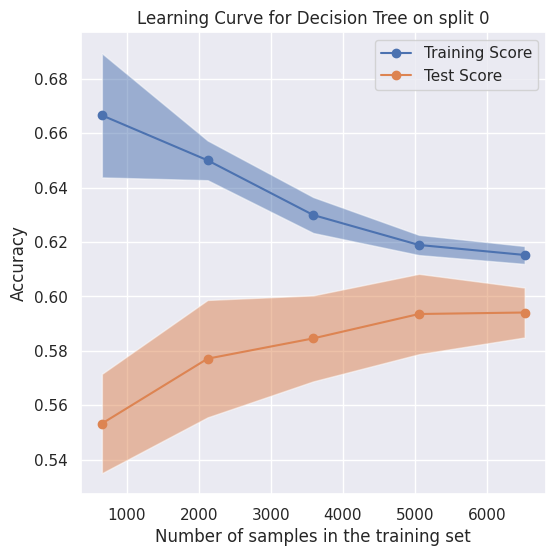

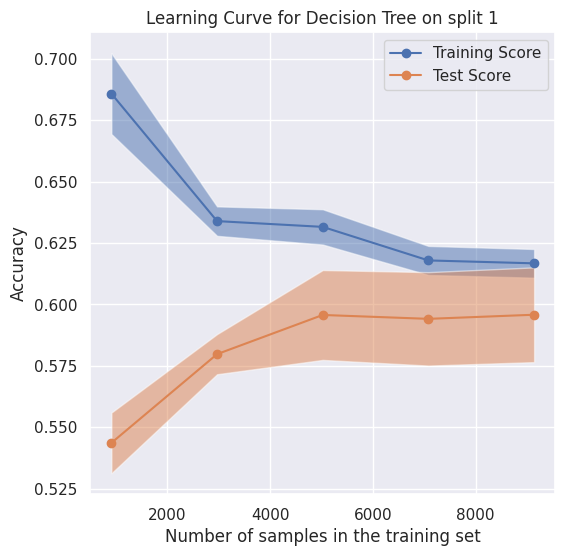

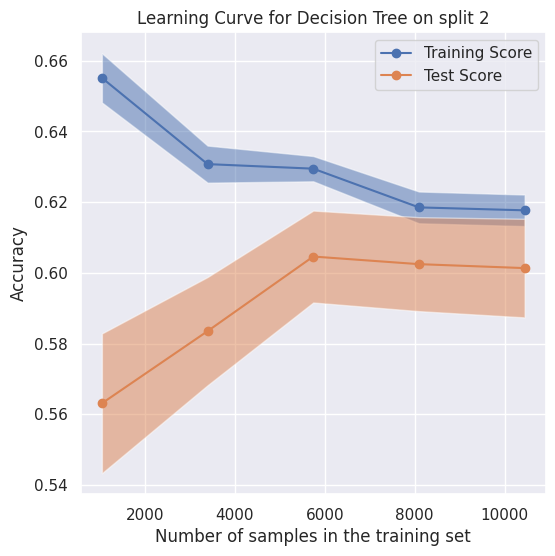

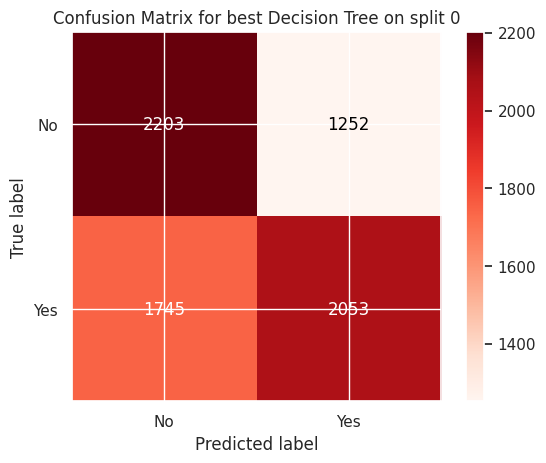

Classification report for best Decision Tree on unseen data on split 0
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      3455
           1       0.62      0.54      0.58      3798

    accuracy                           0.59      7253
   macro avg       0.59      0.59      0.59      7253
weighted avg       0.59      0.59      0.59      7253







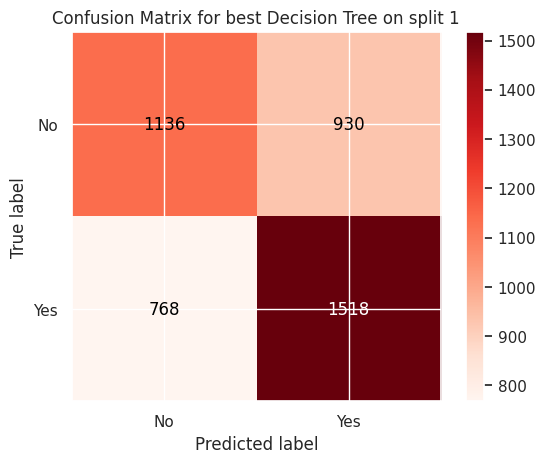

Classification report for best Decision Tree on unseen data on split 1
              precision    recall  f1-score   support

           0       0.60      0.55      0.57      2066
           1       0.62      0.66      0.64      2286

    accuracy                           0.61      4352
   macro avg       0.61      0.61      0.61      4352
weighted avg       0.61      0.61      0.61      4352







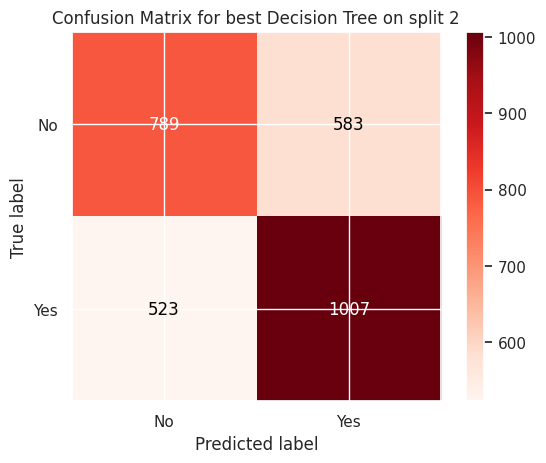

Classification report for best Decision Tree on unseen data on split 2
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1372
           1       0.63      0.66      0.65      1530

    accuracy                           0.62      2902
   macro avg       0.62      0.62      0.62      2902
weighted avg       0.62      0.62      0.62      2902







In [ ]:
models = pipe(dtc(criterion = 'entropy', max_depth = 5, random_state=seed),
              "Decision Tree")
best_models = [0, 5, 8]
best_model_metrics(models, "Decision Tree", best_models)

## 2 - Perceptron

- Doesn't fit with the full dataset



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Perceptron Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.525  		0.275  		0.525  	0.361
1		0.474  		0.225  		0.474  	0.306
2		0.485  		0.496  		0.485  	0.46
3		0.524  		0.275  		0.524  	0.36
4		0.526  		0.751  		0.526  	0.364
5		0.524  		0.513  		0.524  	0.363
6		0.476  		0.226  		0.476  	0.307
7		0.535  		0.531  		0.535  	0.509
8		0.523  		0.274  		0.523  	0.36
9		0.459  		0.452  		0.459  	0.378


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr


Perceptron Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.486  		0.498  		0.486  	0.455
1		0.485  		0.562  		0.485  	0.345
2		0.476  		0.227  		0.476  	0.307
3		0.525  		0.517  		0.525  	0.487
4		0.525  		0.751  		0.525  	0.363
5		0.538  		0.537  		0.538  	0.489
6		0.477  		0.227  		0.477  	0.308
7		0.52  		0.273  		0.52  	0.358
8		0.525  		0.543  		0.525  	0.376
9		0.473  		0.48  		0.473  	0.426


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr


Perceptron Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.471  		0.478  		0.471  	0.438
1		0.49  		0.512  		0.49  	0.429
2		0.477  		0.228  		0.477  	0.308
3		0.477  		0.228  		0.477  	0.308
4		0.527  		0.521  		0.527  	0.472
5		0.523  		0.274  		0.523  	0.36
6		0.532  		0.528  		0.532  	0.491
7		0.5  		0.515  		0.5  	0.473
8		0.524  		0.592  		0.524  	0.363
9		0.492  		0.505  		0.492  	0.466


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


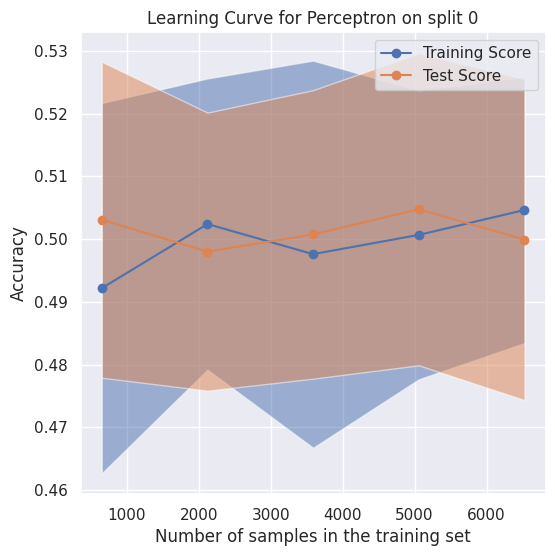

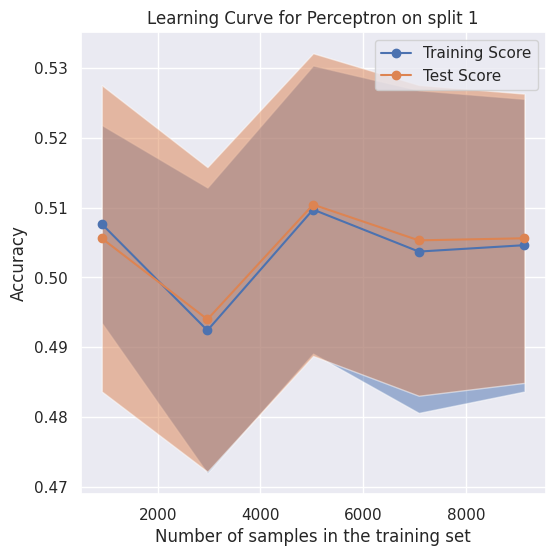

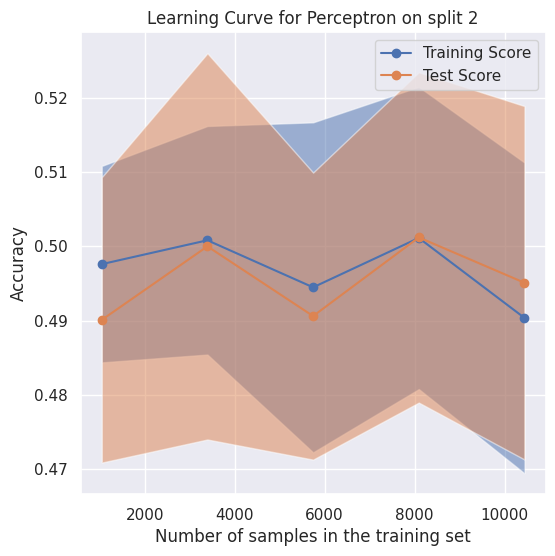

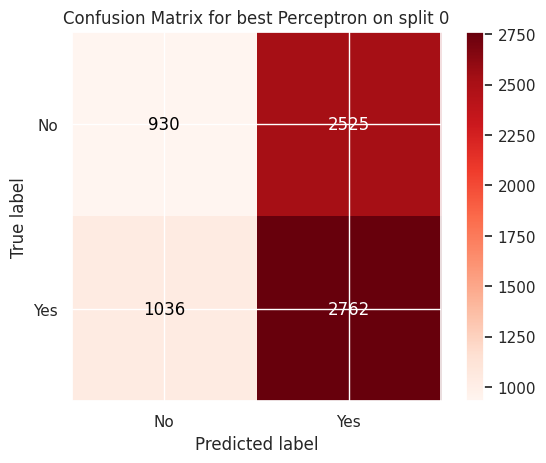

Classification report for best Perceptron on unseen data on split 0
              precision    recall  f1-score   support

           0       0.47      0.27      0.34      3455
           1       0.52      0.73      0.61      3798

    accuracy                           0.51      7253
   macro avg       0.50      0.50      0.48      7253
weighted avg       0.50      0.51      0.48      7253







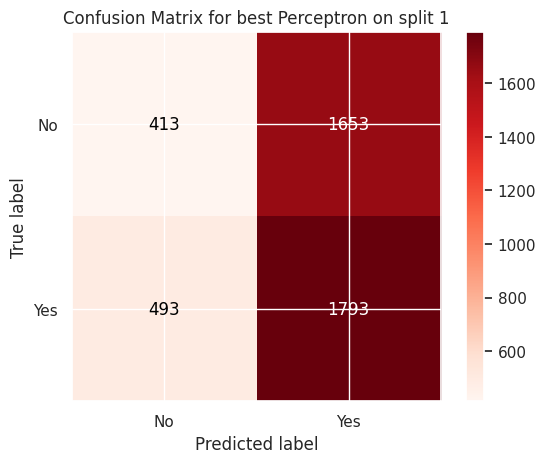

Classification report for best Perceptron on unseen data on split 1
              precision    recall  f1-score   support

           0       0.46      0.20      0.28      2066
           1       0.52      0.78      0.63      2286

    accuracy                           0.51      4352
   macro avg       0.49      0.49      0.45      4352
weighted avg       0.49      0.51      0.46      4352







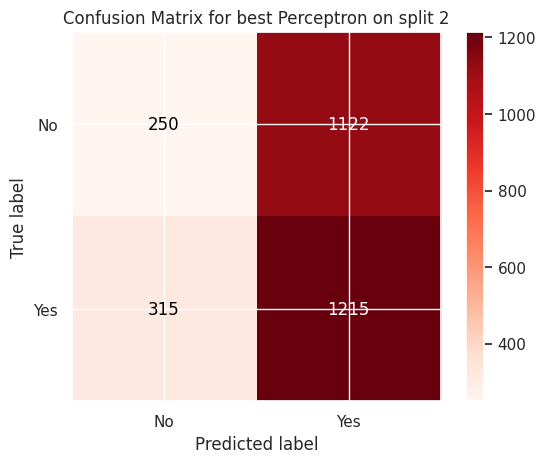

Classification report for best Perceptron on unseen data on split 2
              precision    recall  f1-score   support

           0       0.44      0.18      0.26      1372
           1       0.52      0.79      0.63      1530

    accuracy                           0.50      2902
   macro avg       0.48      0.49      0.44      2902
weighted avg       0.48      0.50      0.45      2902







In [ ]:
models = pipe(Perceptron(random_state=seed, tol = 0.0001, fit_intercept=False),
              "Perceptron")
best_models = [7, 5, 4]
best_model_metrics(models, "Perceptron", best_models)

## 3 - Naive Bayes 


Naive Bayes Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.523  		0.542  		0.523  	0.503
1		0.522  		0.543  		0.522  	0.499
2		0.534  		0.563  		0.534  	0.506
3		0.514  		0.533  		0.514  	0.49
4		0.532  		0.565  		0.532  	0.499
5		0.517  		0.531  		0.517  	0.501
6		0.499  		0.515  		0.499  	0.471
7		0.516  		0.537  		0.516  	0.488
8		0.503  		0.511  		0.503  	0.496
9		0.526  		0.545  		0.526  	0.506

Naive Bayes Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.542  		0.541  		0.542  	0.541
1		0.489  		0.497  		0.489  	0.479
2		0.511  		0.523  		0.511  	0.497
3		0.578  		0.58  		0.578  	0.578
4		0.553  		0.556  		0.553  	0.552
5		0.54  		0.544  		0.54  	0.539
6		0.514  		0.525  		0.514  	0.502
7		0.537  		0.535  		0.537  	0.535
8		0.546  		0.548  		0.546  	0.546
9		0.512  		0.526  		0.512  	0.495

Naive Bayes Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.542  		0.542  		0.542  	0.542
1		0.555  		0.555  		0.555  	0.5

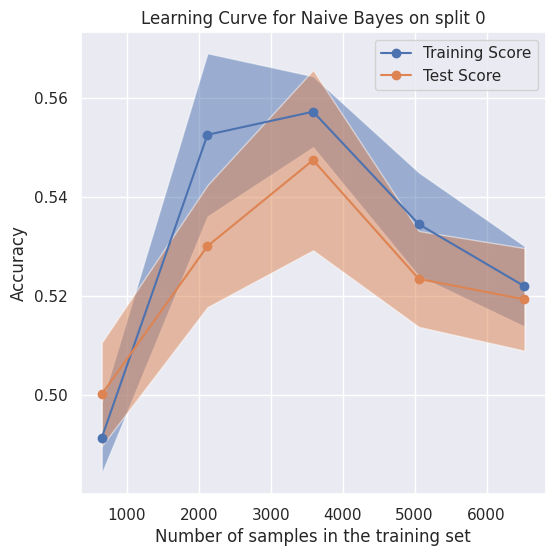

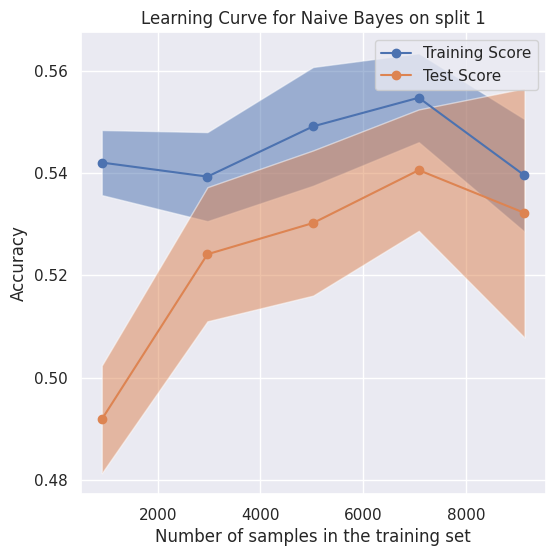

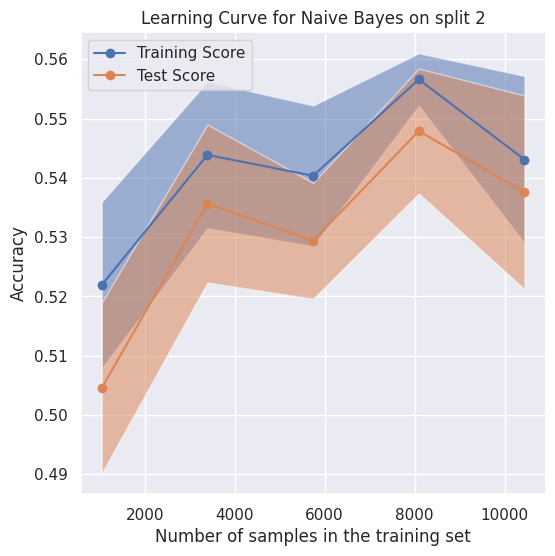

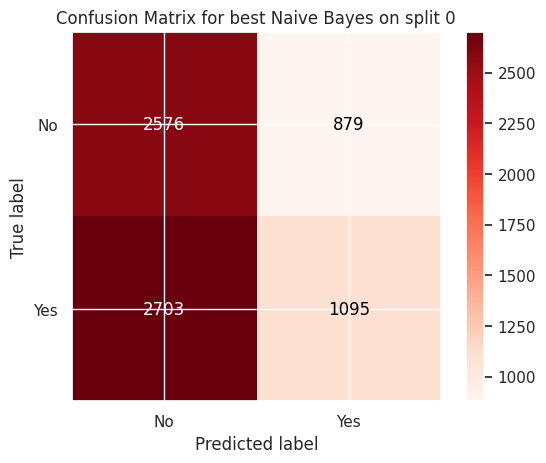

Classification report for best Naive Bayes on unseen data on split 0
              precision    recall  f1-score   support

           0       0.49      0.75      0.59      3455
           1       0.55      0.29      0.38      3798

    accuracy                           0.51      7253
   macro avg       0.52      0.52      0.48      7253
weighted avg       0.52      0.51      0.48      7253







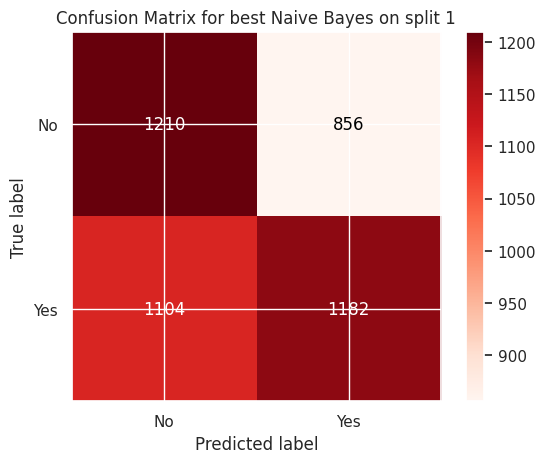

Classification report for best Naive Bayes on unseen data on split 1
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      2066
           1       0.58      0.52      0.55      2286

    accuracy                           0.55      4352
   macro avg       0.55      0.55      0.55      4352
weighted avg       0.55      0.55      0.55      4352







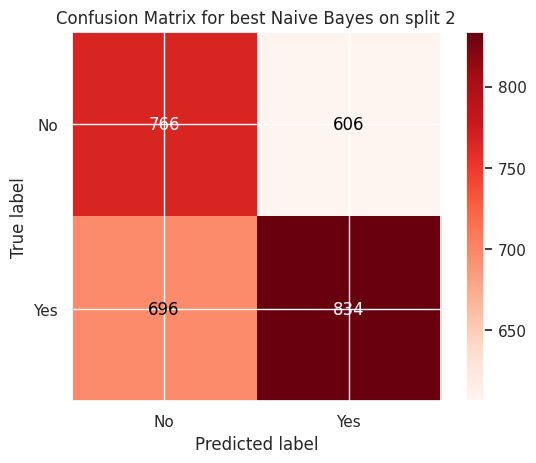

Classification report for best Naive Bayes on unseen data on split 2
              precision    recall  f1-score   support

           0       0.52      0.56      0.54      1372
           1       0.58      0.55      0.56      1530

    accuracy                           0.55      2902
   macro avg       0.55      0.55      0.55      2902
weighted avg       0.55      0.55      0.55      2902







In [ ]:
models = pipe(gnb(),
              "Naive Bayes")
best_models = [2,8,2]
best_model_metrics(models, "Naive Bayes", best_models)

## 4 - Linear regression
- Impossible to compare with other models
- Use RMSE for evaluating models (smaller is better)


Linear Regression Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1			RMSE
0		nan  		nan  		nan  		nan  		-0.483
1		nan  		nan  		nan  		nan  		-0.487
2		nan  		nan  		nan  		nan  		-0.487
3		nan  		nan  		nan  		nan  		-0.485
4		nan  		nan  		nan  		nan  		-0.49
5		nan  		nan  		nan  		nan  		-0.482
6		nan  		nan  		nan  		nan  		-0.489
7		nan  		nan  		nan  		nan  		-0.493
8		nan  		nan  		nan  		nan  		-0.489
9		nan  		nan  		nan  		nan  		-0.486

Linear Regression Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1			RMSE
0		nan  		nan  		nan  		nan  		-0.485
1		nan  		nan  		nan  		nan  		-0.49
2		nan  		nan  		nan  		nan  		-0.486
3		nan  		nan  		nan  		nan  		-0.488
4		nan  		nan  		nan  		nan  		-0.484
5		nan  		nan  		nan  		nan  		-0.486
6		nan  		nan  		nan  		nan  		-0.489
7		nan  		nan  		nan  		nan  		-0.488
8		nan  		nan  		nan  		nan  		-0.489
9		nan  		nan  		nan  		nan  		-0.485

Linear Regression Metrics for 10-fold on split 2
Fold	Acc

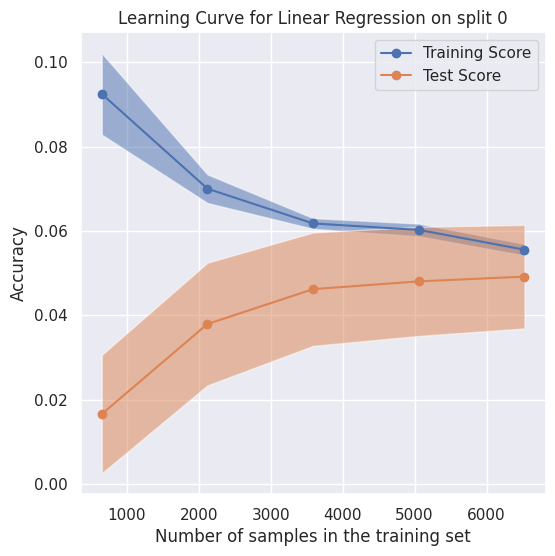

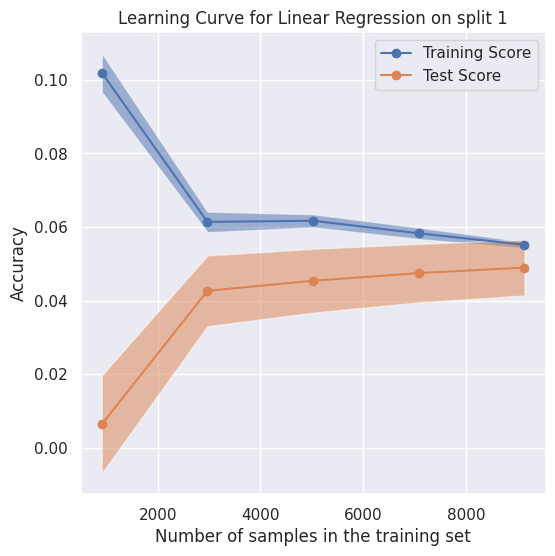

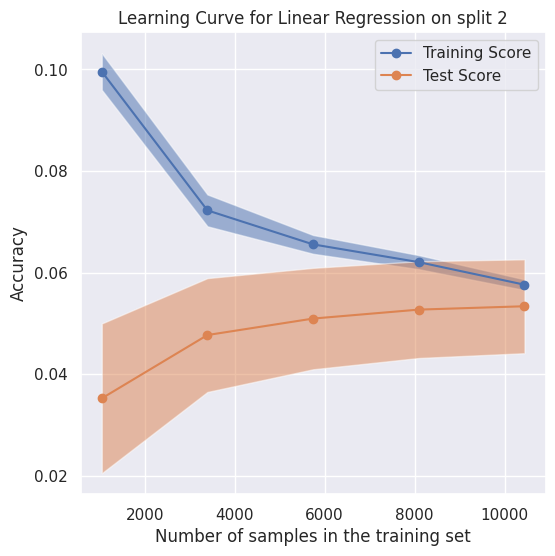

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Linear Regression generates errors because 
models = pipe_for_regression(linr(),
              "Linear Regression")
best_models = [5, 4, 6]

## 5 - Logistic Regression


Logistic Regression Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.618  		0.618  		0.618  	0.617
1		0.598  		0.597  		0.598  	0.597
2		0.591  		0.59  		0.591  	0.588
3		0.604  		0.603  		0.604  	0.603
4		0.59  		0.589  		0.59  	0.589
5		0.593  		0.592  		0.593  	0.591
6		0.592  		0.591  		0.592  	0.59
7		0.554  		0.554  		0.554  	0.554
8		0.579  		0.578  		0.579  	0.578
9		0.617  		0.616  		0.617  	0.615

Logistic Regression Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.594  		0.594  		0.594  	0.594
1		0.589  		0.587  		0.589  	0.586
2		0.584  		0.583  		0.584  	0.583
3		0.593  		0.592  		0.593  	0.592
4		0.621  		0.62  		0.621  	0.618
5		0.612  		0.611  		0.612  	0.609
6		0.581  		0.58  		0.581  	0.578
7		0.597  		0.598  		0.597  	0.597
8		0.575  		0.574  		0.575  	0.574
9		0.614  		0.613  		0.614  	0.611

Logistic Regression Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.586  		0.585  		0.586  	0.585
1		0.581  

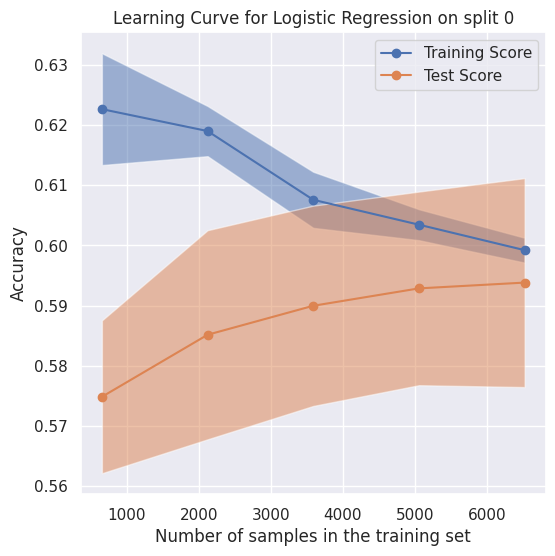

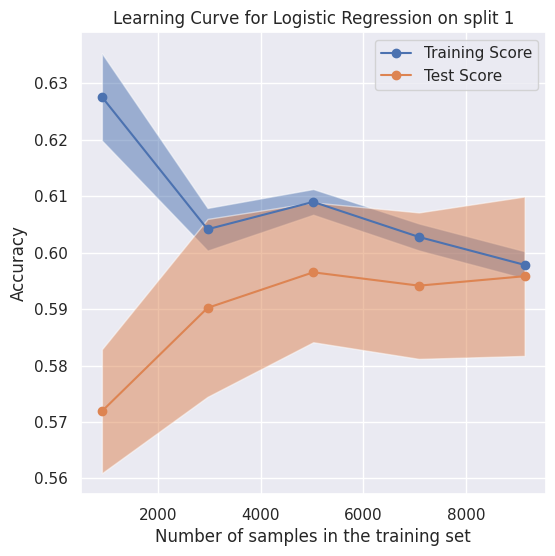

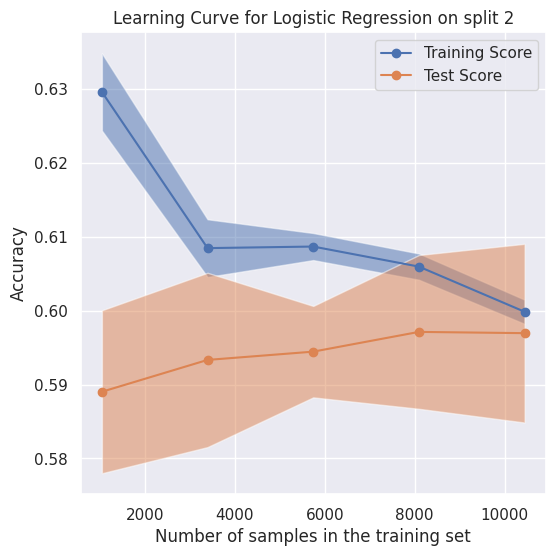

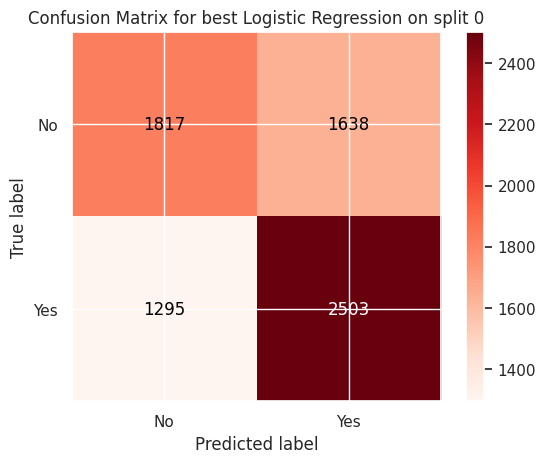

Classification report for best Logistic Regression on unseen data on split 0
              precision    recall  f1-score   support

           0       0.58      0.53      0.55      3455
           1       0.60      0.66      0.63      3798

    accuracy                           0.60      7253
   macro avg       0.59      0.59      0.59      7253
weighted avg       0.59      0.60      0.59      7253







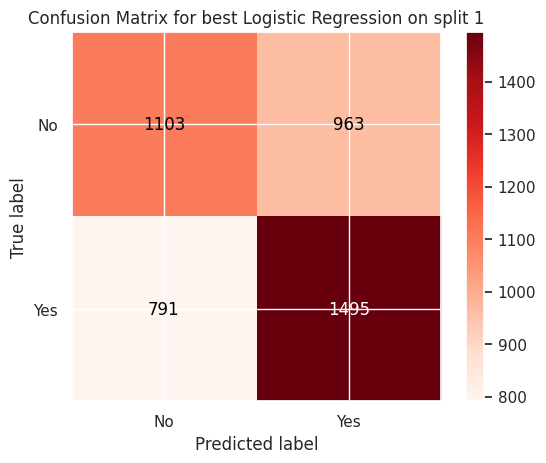

Classification report for best Logistic Regression on unseen data on split 1
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      2066
           1       0.61      0.65      0.63      2286

    accuracy                           0.60      4352
   macro avg       0.60      0.59      0.59      4352
weighted avg       0.60      0.60      0.60      4352







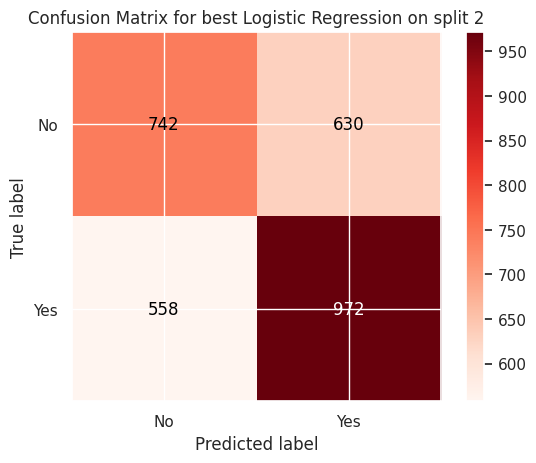

Classification report for best Logistic Regression on unseen data on split 2
              precision    recall  f1-score   support

           0       0.57      0.54      0.56      1372
           1       0.61      0.64      0.62      1530

    accuracy                           0.59      2902
   macro avg       0.59      0.59      0.59      2902
weighted avg       0.59      0.59      0.59      2902







In [ ]:
models = pipe(LogisticRegression(solver= 'newton-cholesky', max_iter=100, random_state=seed),
              "Logistic Regression")
best_models = [0, 4, 8]
best_model_metrics(models, "Logistic Regression", best_models)

## 6 - SVM with linear Kernel


SVM with linear kernel Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.612  		0.616  		0.612  	0.611
1		0.551  		0.562  		0.551  	0.545
2		0.59  		0.591  		0.59  	0.59
3		0.596  		0.598  		0.596  	0.596
4		0.577  		0.581  		0.577  	0.576
5		0.577  		0.583  		0.577  	0.575
6		0.585  		0.588  		0.585  	0.585
7		0.572  		0.577  		0.572  	0.571
8		0.564  		0.572  		0.564  	0.561
9		0.549  		0.558  		0.549  	0.545

SVM with linear kernel Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.593  		0.595  		0.593  	0.592
1		0.536  		0.544  		0.536  	0.532
2		0.56  		0.563  		0.56  	0.56
3		0.584  		0.587  		0.584  	0.584
4		0.623  		0.623  		0.623  	0.623
5		0.61  		0.612  		0.61  	0.61
6		0.575  		0.578  		0.575  	0.575
7		0.547  		0.561  		0.547  	0.537
8		0.552  		0.555  		0.552  	0.551
9		0.6  		0.603  		0.6  	0.6

SVM with linear kernel Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.586  		0.589  		0.586  	0.586
1		0.561  

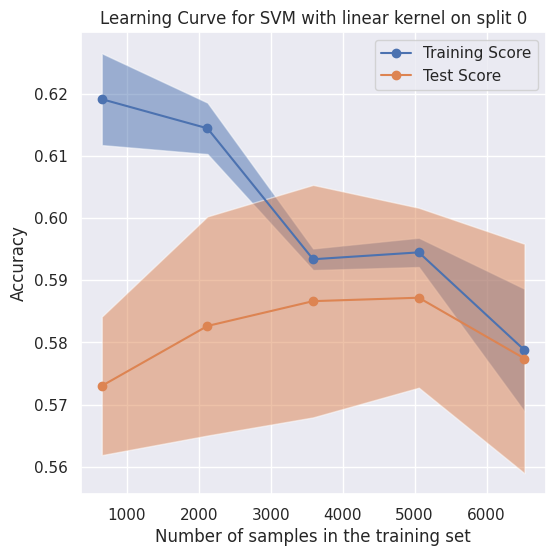

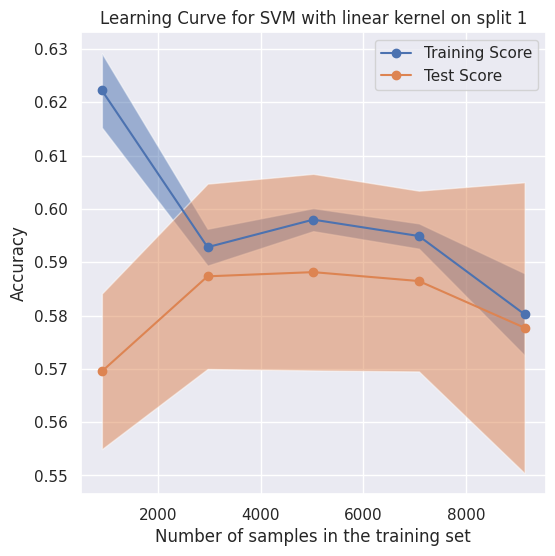

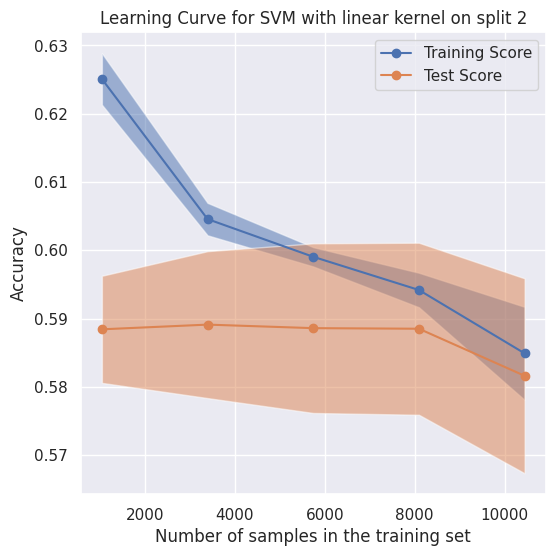

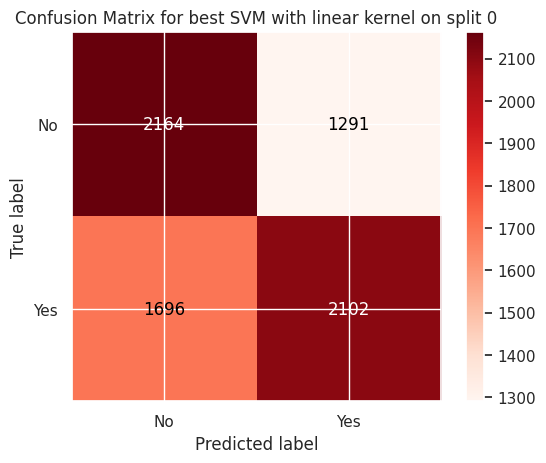

Classification report for best SVM with linear kernel on unseen data on split 0
              precision    recall  f1-score   support

           0       0.56      0.63      0.59      3455
           1       0.62      0.55      0.58      3798

    accuracy                           0.59      7253
   macro avg       0.59      0.59      0.59      7253
weighted avg       0.59      0.59      0.59      7253







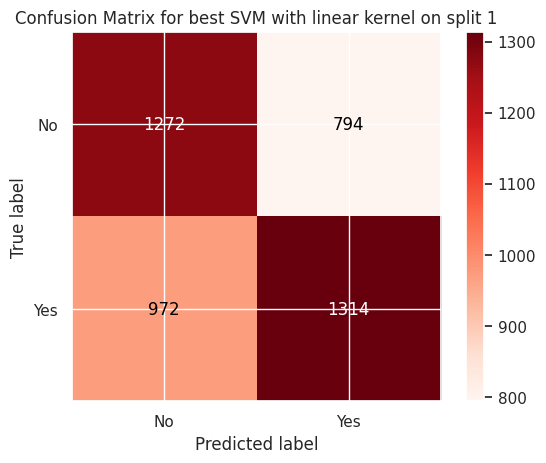

Classification report for best SVM with linear kernel on unseen data on split 1
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      2066
           1       0.62      0.57      0.60      2286

    accuracy                           0.59      4352
   macro avg       0.60      0.60      0.59      4352
weighted avg       0.60      0.59      0.59      4352







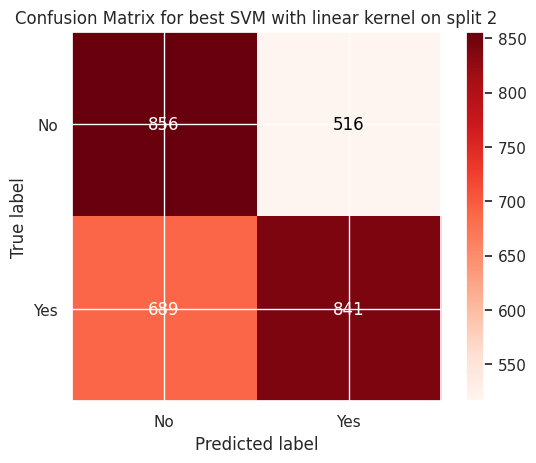

Classification report for best SVM with linear kernel on unseen data on split 2
              precision    recall  f1-score   support

           0       0.55      0.62      0.59      1372
           1       0.62      0.55      0.58      1530

    accuracy                           0.58      2902
   macro avg       0.59      0.59      0.58      2902
weighted avg       0.59      0.58      0.58      2902







In [ ]:
models = pipe(make_pipeline(StandardScaler(),SVC(kernel = 'linear',random_state=seed, class_weight='balanced',cache_size=1000, gamma='scale')),"SVM with linear kernel")
best_models = [0, 4, 5]
best_model_metrics(models, "SVM with linear kernel", best_models)

## 7 - SVM with RBF Kernel



Support Vector Machine - RBF Kernel Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.507  		0.529  		0.507  	0.472
1		0.507  		0.523  		0.507  	0.484
2		0.528  		0.553  		0.528  	0.5
3		0.534  		0.554  		0.534  	0.514
4		0.498  		0.511  		0.498  	0.475
5		0.509  		0.525  		0.509  	0.486
6		0.494  		0.507  		0.494  	0.468
7		0.508  		0.527  		0.508  	0.478
8		0.509  		0.527  		0.509  	0.483
9		0.502  		0.521  		0.502  	0.471

Support Vector Machine - RBF Kernel Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.492  		0.504  		0.492  	0.467
1		0.524  		0.544  		0.524  	0.501
2		0.521  		0.538  		0.521  	0.5
3		0.512  		0.526  		0.512  	0.493
4		0.481  		0.49  		0.481  	0.455
5		0.512  		0.531  		0.512  	0.487
6		0.526  		0.546  		0.526  	0.504
7		0.498  		0.51  		0.498  	0.476
8		0.519  		0.54  		0.519  	0.492
9		0.523  		0.546  		0.523  	0.495

Support Vector Machine - RBF Kernel Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F

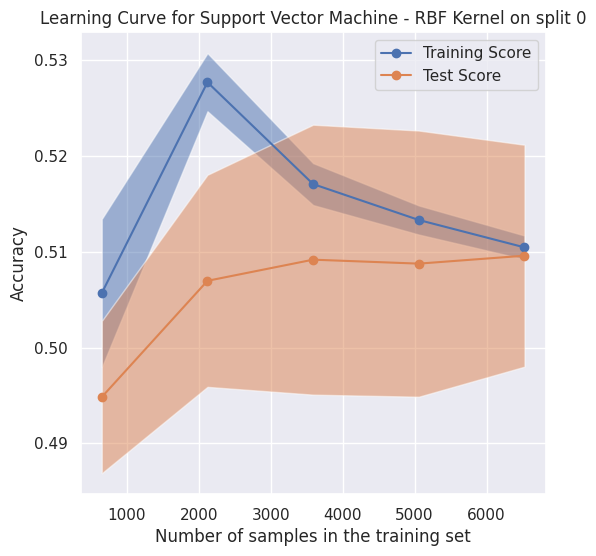

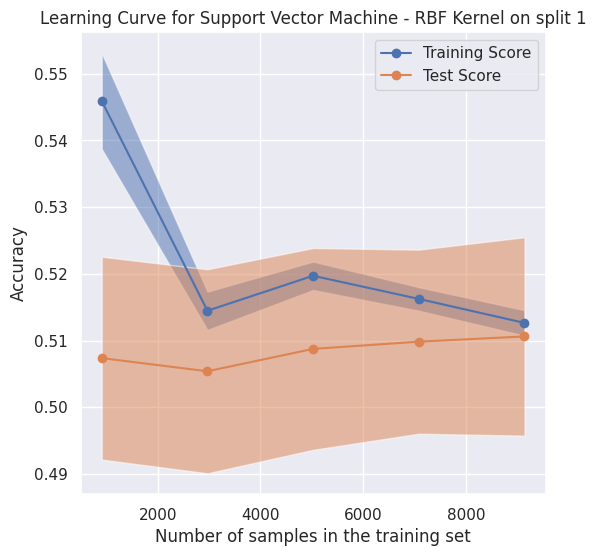

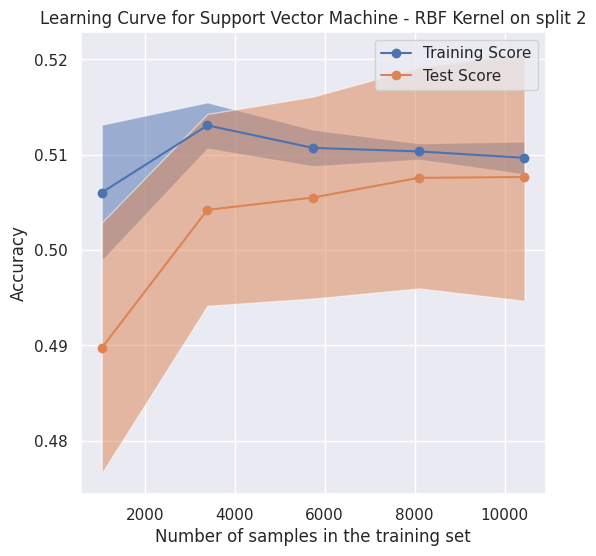

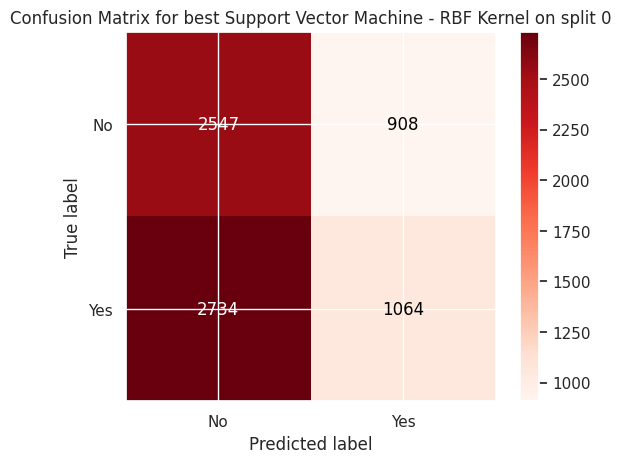

Classification report for best Support Vector Machine - RBF Kernel on unseen data on split 0
              precision    recall  f1-score   support

           0       0.48      0.74      0.58      3455
           1       0.54      0.28      0.37      3798

    accuracy                           0.50      7253
   macro avg       0.51      0.51      0.48      7253
weighted avg       0.51      0.50      0.47      7253







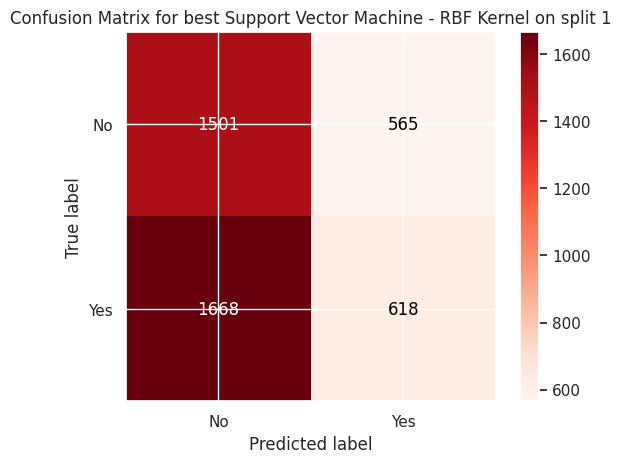

Classification report for best Support Vector Machine - RBF Kernel on unseen data on split 1
              precision    recall  f1-score   support

           0       0.47      0.73      0.57      2066
           1       0.52      0.27      0.36      2286

    accuracy                           0.49      4352
   macro avg       0.50      0.50      0.46      4352
weighted avg       0.50      0.49      0.46      4352







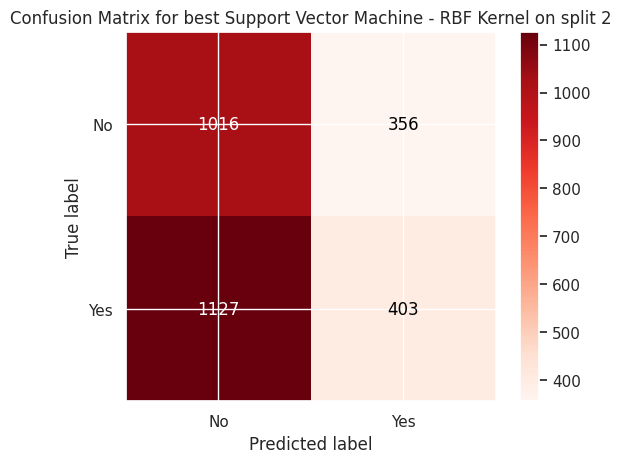

Classification report for best Support Vector Machine - RBF Kernel on unseen data on split 2
              precision    recall  f1-score   support

           0       0.47      0.74      0.58      1372
           1       0.53      0.26      0.35      1530

    accuracy                           0.49      2902
   macro avg       0.50      0.50      0.47      2902
weighted avg       0.50      0.49      0.46      2902







In [ ]:
models = pipe(SVC(kernel = 'rbf',random_state=seed, class_weight='balanced',
                  cache_size=1000, gamma='scale'),
              "Support Vector Machine - RBF Kernel")
best_models = [2, 1, 4]
best_model_metrics(models, "Support Vector Machine - RBF Kernel", best_models)

## 8 - Multi Layer Perceptron
- Reducing number of features allows the model to actually fit to training data
- Performs significantly better than a single perceptron



Multi Layer Perceptron Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.511  		0.536  		0.511  	0.474
1		0.544  		0.545  		0.544  	0.544
2		0.545  		0.553  		0.545  	0.485
3		0.509  		0.508  		0.509  	0.509
4		0.503  		0.522  		0.503  	0.473
5		0.497  		0.514  		0.497  	0.46
6		0.488  		0.548  		0.488  	0.367
7		0.486  		0.486  		0.486  	0.486
8		0.508  		0.518  		0.508  	0.497
9		0.545  		0.564  		0.545  	0.53

Multi Layer Perceptron Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.526  		0.521  		0.526  	0.414
1		0.502  		0.536  		0.502  	0.438
2		0.489  		0.499  		0.489  	0.471
3		0.522  		0.513  		0.522  	0.484
4		0.487  		0.527  		0.487  	0.378
5		0.541  		0.552  		0.541  	0.464
6		0.554  		0.579  		0.554  	0.482
7		0.534  		0.533  		0.534  	0.532
8		0.549  		0.547  		0.549  	0.531
9		0.534  		0.59  		0.534  	0.402

Multi Layer Perceptron Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.558  		0.557  		0.558  	0.55

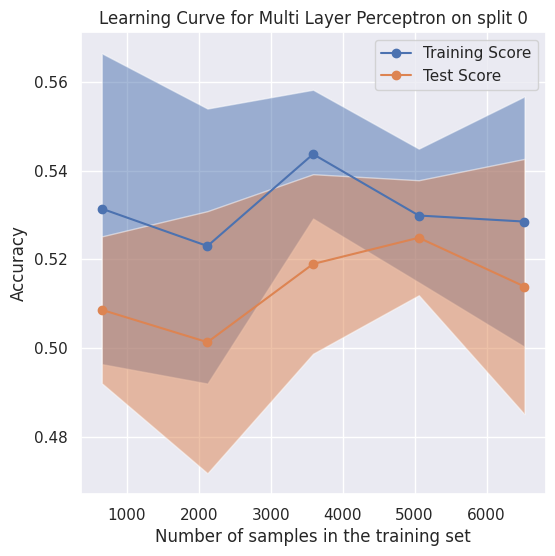

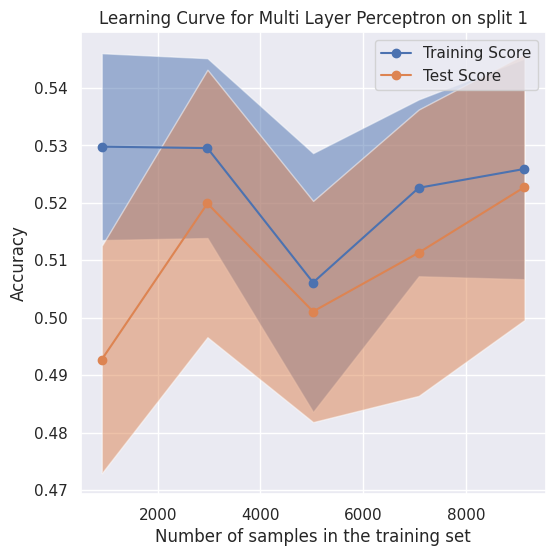

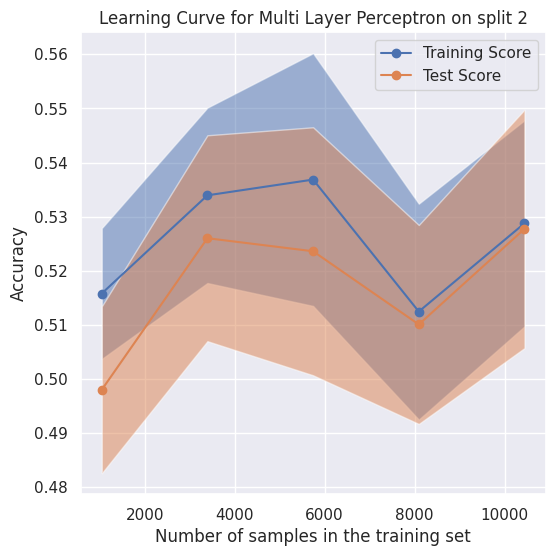

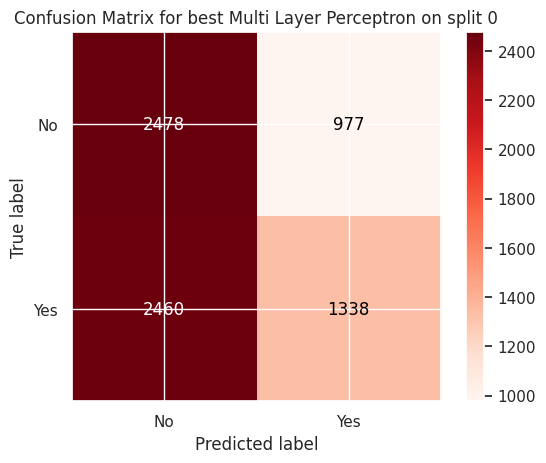

Classification report for best Multi Layer Perceptron on unseen data on split 0
              precision    recall  f1-score   support

           0       0.50      0.72      0.59      3455
           1       0.58      0.35      0.44      3798

    accuracy                           0.53      7253
   macro avg       0.54      0.53      0.51      7253
weighted avg       0.54      0.53      0.51      7253







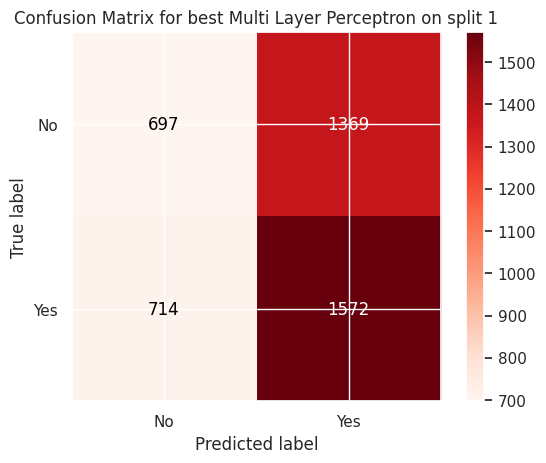

Classification report for best Multi Layer Perceptron on unseen data on split 1
              precision    recall  f1-score   support

           0       0.49      0.34      0.40      2066
           1       0.53      0.69      0.60      2286

    accuracy                           0.52      4352
   macro avg       0.51      0.51      0.50      4352
weighted avg       0.52      0.52      0.51      4352







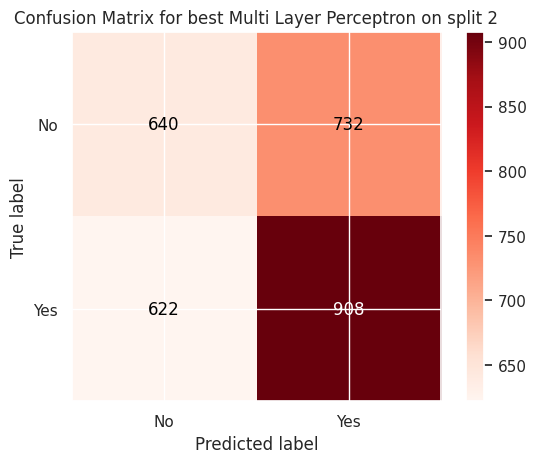

Classification report for best Multi Layer Perceptron on unseen data on split 2
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1372
           1       0.55      0.59      0.57      1530

    accuracy                           0.53      2902
   macro avg       0.53      0.53      0.53      2902
weighted avg       0.53      0.53      0.53      2902







In [ ]:
models = pipe(mlp(hidden_layer_sizes = (100,),shuffle = False, learning_rate = 'adaptive',random_state=seed),
              "Multi Layer Perceptron")
best_models = [9,8,6]
best_model_metrics(models, "Multi Layer Perceptron", best_models)

## 9 - Gradient Boosting
- loss = log loss - works well on probabilistic labels
- learning rate =  0.1
- n_estimators = 100
- subsample = 1.0
- criterion = ‘friedman_mse’
- min_samples_split: 2


Gradient Boosting Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.61  		0.609  		0.61  	0.609
1		0.599  		0.598  		0.599  	0.598
2		0.628  		0.627  		0.628  	0.627
3		0.619  		0.619  		0.619  	0.617
4		0.632  		0.631  		0.632  	0.63
5		0.581  		0.58  		0.581  	0.58
6		0.601  		0.601  		0.601  	0.601
7		0.603  		0.602  		0.603  	0.602
8		0.594  		0.594  		0.594  	0.593
9		0.594  		0.594  		0.594  	0.593

Gradient Boosting Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.631  		0.63  		0.631  	0.63
1		0.6  		0.6  		0.6  	0.598
2		0.604  		0.603  		0.604  	0.603
3		0.602  		0.602  		0.602  	0.601
4		0.622  		0.621  		0.622  	0.619
5		0.633  		0.632  		0.633  	0.632
6		0.613  		0.613  		0.613  	0.608
7		0.6  		0.599  		0.6  	0.599
8		0.617  		0.616  		0.617  	0.616
9		0.647  		0.647  		0.647  	0.646

Gradient Boosting Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.633  		0.633  		0.633  	0.631
1		0.623  		0.622  		0.623 

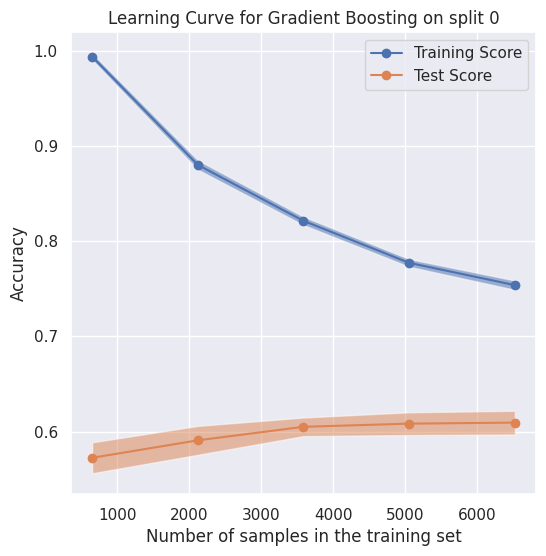

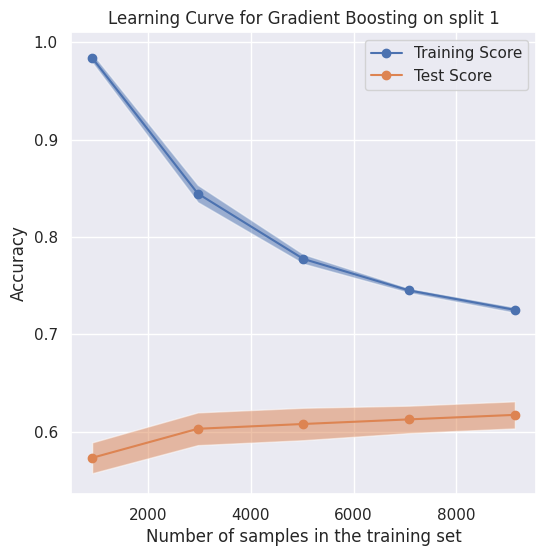

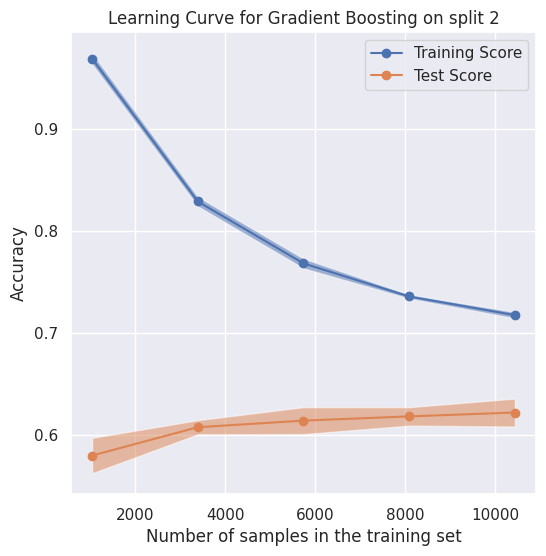

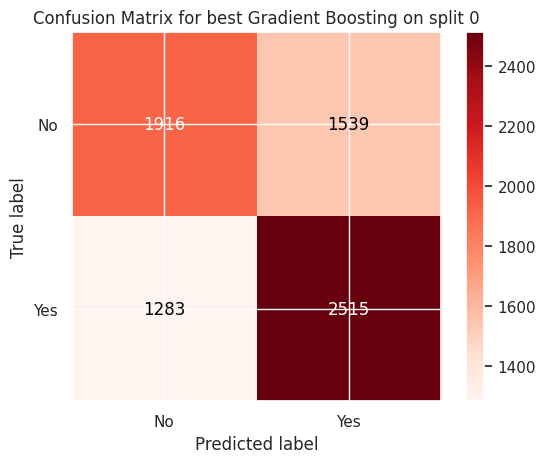

Classification report for best Gradient Boosting on unseen data on split 0
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      3455
           1       0.62      0.66      0.64      3798

    accuracy                           0.61      7253
   macro avg       0.61      0.61      0.61      7253
weighted avg       0.61      0.61      0.61      7253







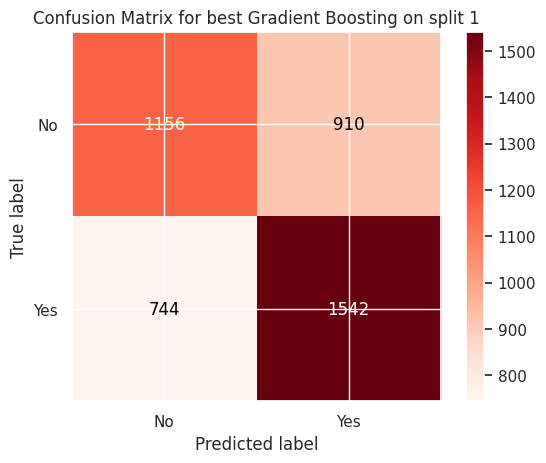

Classification report for best Gradient Boosting on unseen data on split 1
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      2066
           1       0.63      0.67      0.65      2286

    accuracy                           0.62      4352
   macro avg       0.62      0.62      0.62      4352
weighted avg       0.62      0.62      0.62      4352







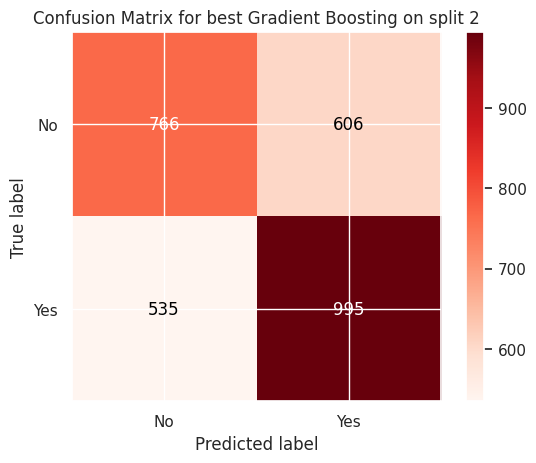

Classification report for best Gradient Boosting on unseen data on split 2
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1372
           1       0.62      0.65      0.64      1530

    accuracy                           0.61      2902
   macro avg       0.61      0.60      0.60      2902
weighted avg       0.61      0.61      0.61      2902







In [ ]:
models = pipe(gbc(loss = 'log_loss',learning_rate = 0.1,n_estimators = 100,
                  subsample = 1.0,criterion = 'friedman_mse',max_depth = 4,
                  random_state=seed),
              "Gradient Boosting")
best_models = [4,9,2]
best_model_metrics(models, "Gradient Boosting", best_models)

## Extra credit 1 - Classifier using Ridge regression


Classifier using Ridge regression Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.618  		0.618  		0.618  	0.617
1		0.599  		0.598  		0.599  	0.598
2		0.594  		0.593  		0.594  	0.591
3		0.603  		0.602  		0.603  	0.601
4		0.59  		0.589  		0.59  	0.589
5		0.594  		0.593  		0.594  	0.592
6		0.59  		0.589  		0.59  	0.589
7		0.556  		0.555  		0.556  	0.555
8		0.578  		0.577  		0.578  	0.577
9		0.615  		0.614  		0.615  	0.614

Classifier using Ridge regression Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.594  		0.593  		0.594  	0.593
1		0.588  		0.586  		0.588  	0.585
2		0.586  		0.585  		0.586  	0.585
3		0.591  		0.59  		0.591  	0.59
4		0.619  		0.618  		0.619  	0.616
5		0.612  		0.611  		0.612  	0.609
6		0.579  		0.578  		0.579  	0.576
7		0.599  		0.6  		0.599  	0.599
8		0.575  		0.574  		0.575  	0.574
9		0.615  		0.614  		0.615  	0.613

Classifier using Ridge regression Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.

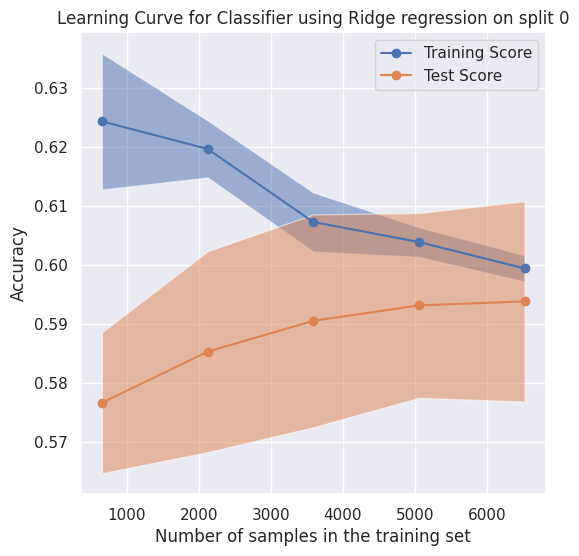

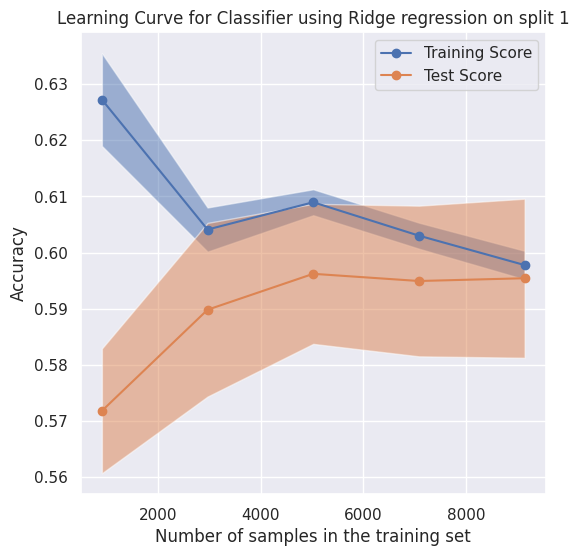

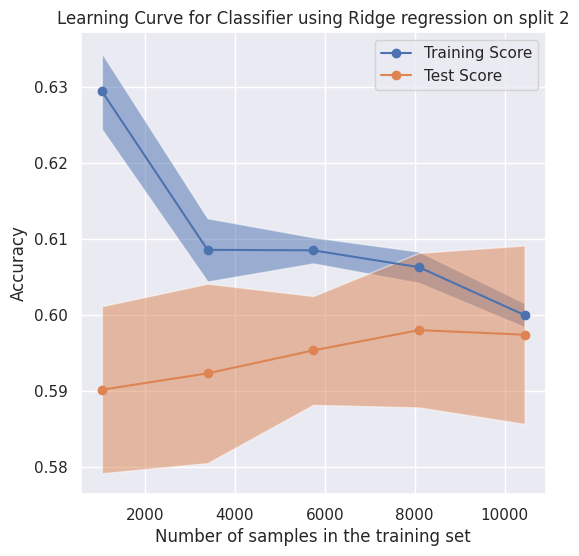

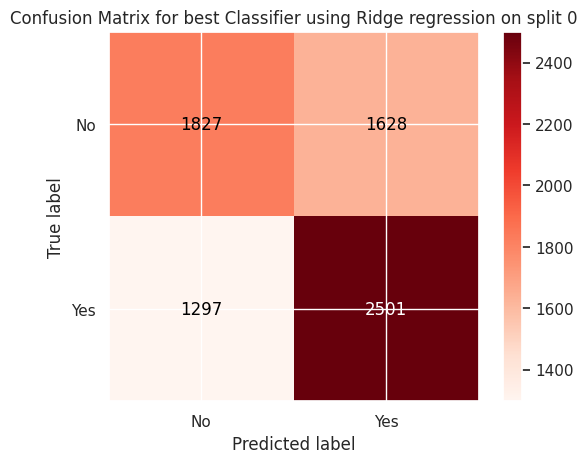

Classification report for best Classifier using Ridge regression on unseen data on split 0
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      3455
           1       0.61      0.66      0.63      3798

    accuracy                           0.60      7253
   macro avg       0.60      0.59      0.59      7253
weighted avg       0.60      0.60      0.59      7253







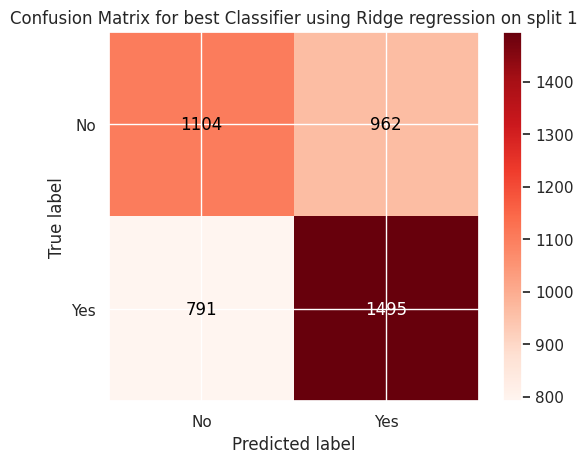

Classification report for best Classifier using Ridge regression on unseen data on split 1
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      2066
           1       0.61      0.65      0.63      2286

    accuracy                           0.60      4352
   macro avg       0.60      0.59      0.59      4352
weighted avg       0.60      0.60      0.60      4352







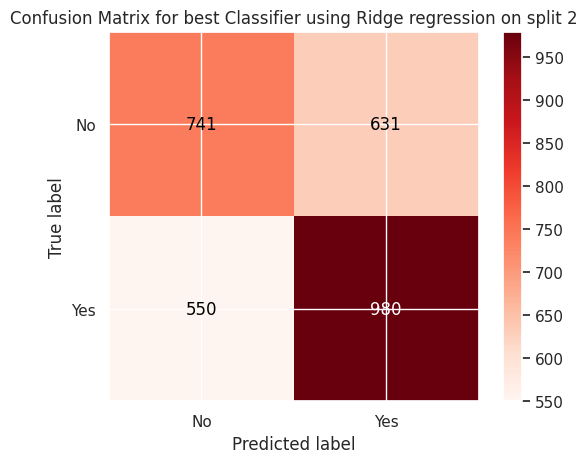

Classification report for best Classifier using Ridge regression on unseen data on split 2
              precision    recall  f1-score   support

           0       0.57      0.54      0.56      1372
           1       0.61      0.64      0.62      1530

    accuracy                           0.59      2902
   macro avg       0.59      0.59      0.59      2902
weighted avg       0.59      0.59      0.59      2902







In [ ]:
models = pipe(lnrc(random_state = seed), "Classifier using Ridge regression")
best_models = [0,4,9]
best_model_metrics(models, "Classifier using Ridge regression", best_models)

## Extra credit 2 - K Nearest Neighbors Classifier


K Nearest Neighbors Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.503  		0.503  		0.503  	0.503
1		0.493  		0.494  		0.493  	0.493
2		0.53  		0.529  		0.53  	0.53
3		0.539  		0.54  		0.539  	0.539
4		0.492  		0.49  		0.492  	0.491
5		0.513  		0.511  		0.513  	0.512
6		0.486  		0.485  		0.486  	0.485
7		0.514  		0.512  		0.514  	0.512
8		0.521  		0.52  		0.521  	0.52
9		0.523  		0.522  		0.523  	0.522

K Nearest Neighbors Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.533  		0.532  		0.533  	0.532
1		0.531  		0.53  		0.531  	0.53
2		0.49  		0.489  		0.49  	0.489
3		0.537  		0.538  		0.537  	0.538
4		0.49  		0.489  		0.49  	0.489
5		0.522  		0.521  		0.522  	0.521
6		0.48  		0.478  		0.48  	0.479
7		0.538  		0.537  		0.538  	0.538
8		0.542  		0.541  		0.542  	0.54
9		0.502  		0.502  		0.502  	0.502

K Nearest Neighbors Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.517  		0.516  		0.517  	0.516
1		0.5  		0.5  		0.5

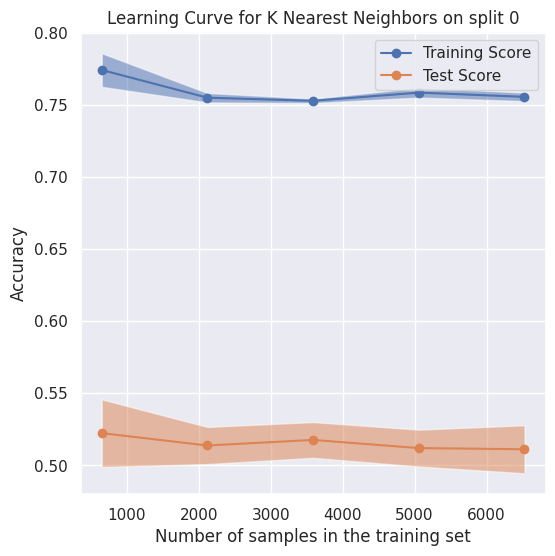

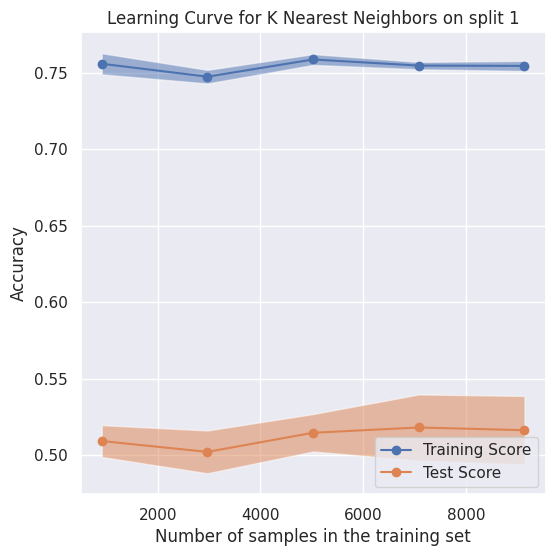

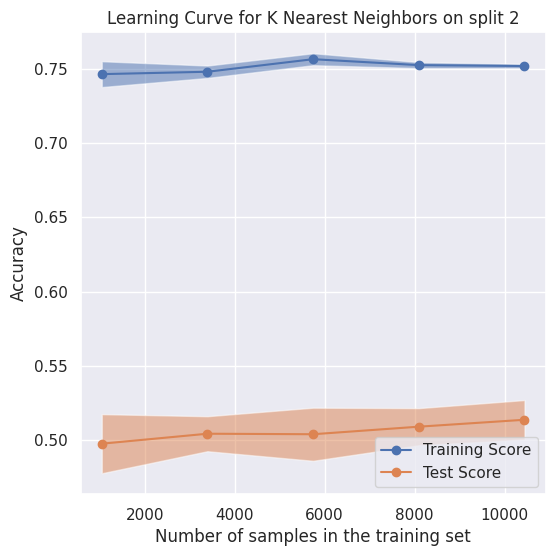

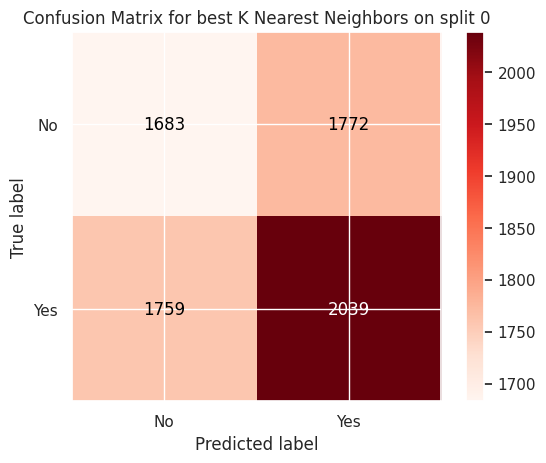

Classification report for best K Nearest Neighbors on unseen data on split 0
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      3455
           1       0.54      0.54      0.54      3798

    accuracy                           0.51      7253
   macro avg       0.51      0.51      0.51      7253
weighted avg       0.51      0.51      0.51      7253







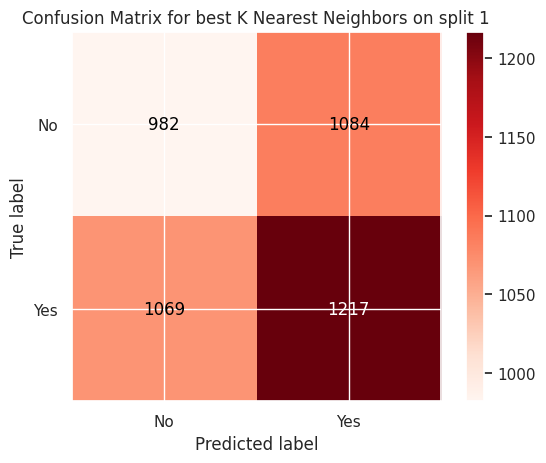

Classification report for best K Nearest Neighbors on unseen data on split 1
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      2066
           1       0.53      0.53      0.53      2286

    accuracy                           0.51      4352
   macro avg       0.50      0.50      0.50      4352
weighted avg       0.51      0.51      0.51      4352







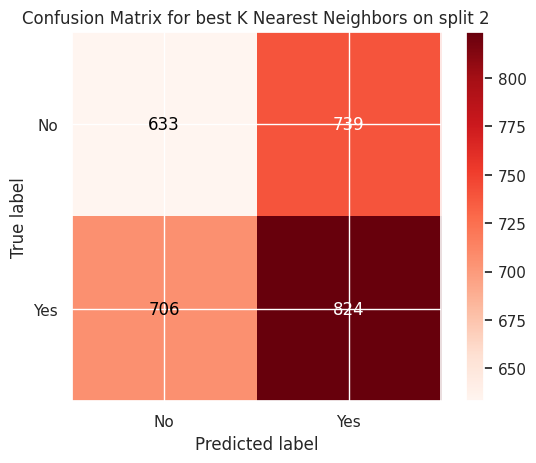

Classification report for best K Nearest Neighbors on unseen data on split 2
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1372
           1       0.53      0.54      0.53      1530

    accuracy                           0.50      2902
   macro avg       0.50      0.50      0.50      2902
weighted avg       0.50      0.50      0.50      2902







In [ ]:
models = pipe(KNeighborsClassifier(n_neighbors=3), "K Nearest Neighbors")
best_models = [2,8,3]
best_model_metrics(models, "K Nearest Neighbors", best_models)

## Extra credit 3 - Passive Aggressive Classifier


Passive Aggressive Classifier Metrics for 10-fold on split 0
Fold	Accuracy	Precision	Recall		F1
0		0.507  		0.501  		0.507  	0.496
1		0.504  		0.489  		0.504  	0.466
2		0.51  		0.532  		0.51  	0.477
3		0.476  		0.485  		0.476  	0.441
4		0.523  		0.506  		0.523  	0.395
5		0.52  		0.41  		0.52  	0.363
6		0.521  		0.505  		0.521  	0.42
7		0.532  		0.604  		0.532  	0.39
8		0.51  		0.499  		0.51  	0.478
9		0.476  		0.493  		0.476  	0.357

Passive Aggressive Classifier Metrics for 10-fold on split 1
Fold	Accuracy	Precision	Recall		F1
0		0.529  		0.524  		0.529  	0.511
1		0.474  		0.473  		0.474  	0.334
2		0.481  		0.497  		0.481  	0.409
3		0.523  		0.433  		0.523  	0.361
4		0.473  		0.226  		0.473  	0.306
5		0.46  		0.464  		0.46  	0.455
6		0.488  		0.502  		0.488  	0.447
7		0.484  		0.5  		0.484  	0.419
8		0.483  		0.494  		0.483  	0.444
9		0.551  		0.574  		0.551  	0.476

Passive Aggressive Classifier Metrics for 10-fold on split 2
Fold	Accuracy	Precision	Recall		F1
0		0.494  		0.501  		0

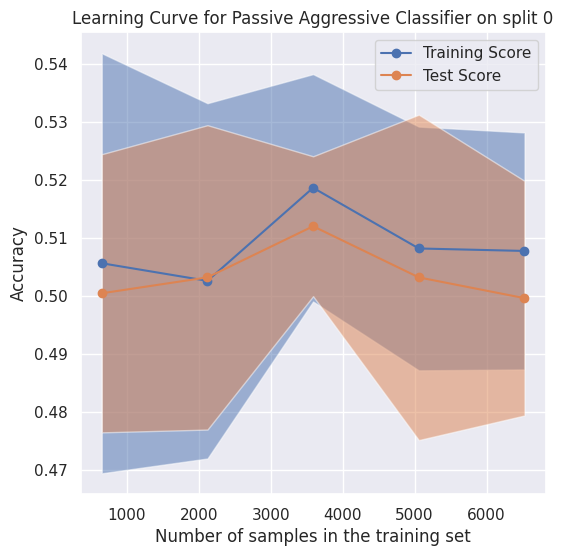

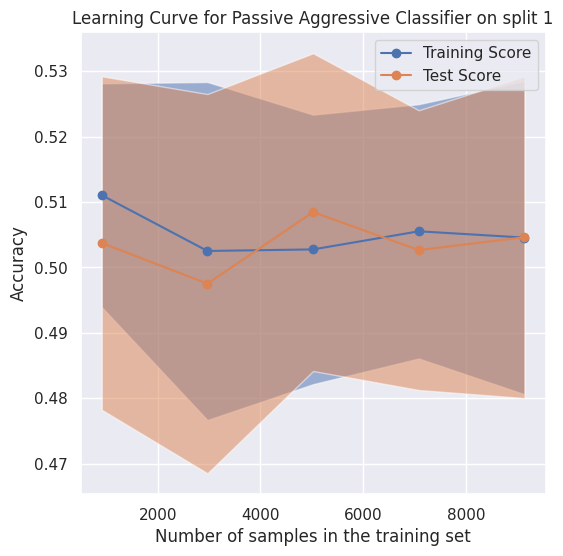

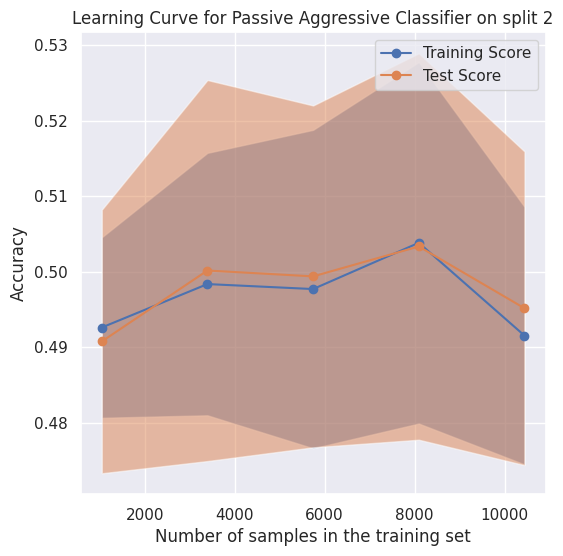

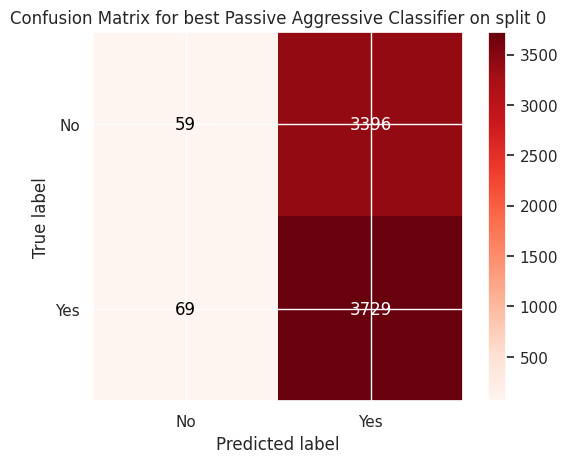

Classification report for best Passive Aggressive Classifier on unseen data on split 0
              precision    recall  f1-score   support

           0       0.46      0.02      0.03      3455
           1       0.52      0.98      0.68      3798

    accuracy                           0.52      7253
   macro avg       0.49      0.50      0.36      7253
weighted avg       0.49      0.52      0.37      7253







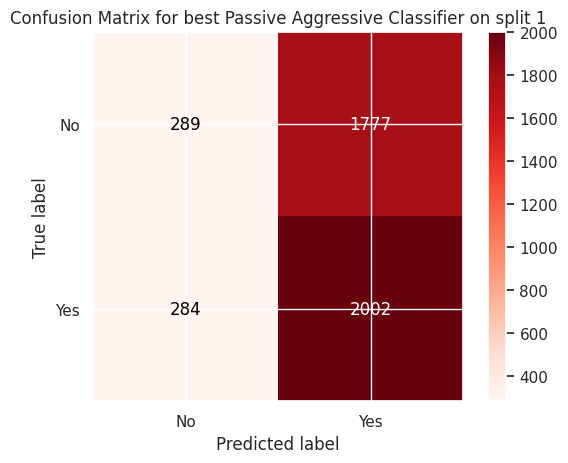

Classification report for best Passive Aggressive Classifier on unseen data on split 1
              precision    recall  f1-score   support

           0       0.50      0.14      0.22      2066
           1       0.53      0.88      0.66      2286

    accuracy                           0.53      4352
   macro avg       0.52      0.51      0.44      4352
weighted avg       0.52      0.53      0.45      4352







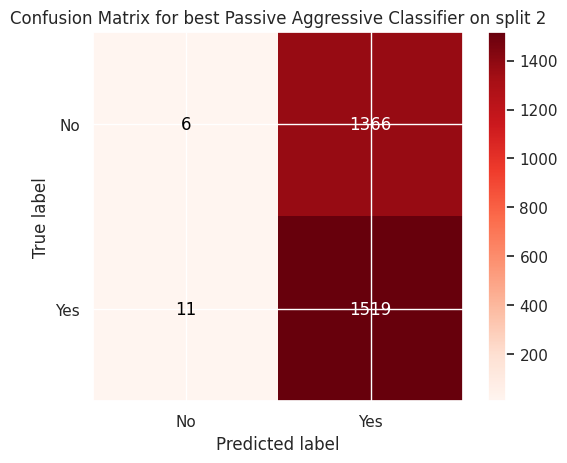

Classification report for best Passive Aggressive Classifier on unseen data on split 2
              precision    recall  f1-score   support

           0       0.35      0.00      0.01      1372
           1       0.53      0.99      0.69      1530

    accuracy                           0.53      2902
   macro avg       0.44      0.50      0.35      2902
weighted avg       0.44      0.53      0.37      2902







In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

models = pipe(PassiveAggressiveClassifier(max_iter=1000, random_state = seed), "Passive Aggressive Classifier")
best_models = [7,9,6]
best_model_metrics(models, "Passive Aggressive Classifier", best_models)